In [44]:

"""
================================================================================
PROYECTO FINAL - INTELIGENCIA ARTIFICIAL
ANÁLISIS DE DATOS SABER 11 - PREDICCIÓN DE DESEMPEÑO EN INGLÉS
================================================================================
Estudiantes: Flavio Arregoces, Cristian Gonzales  
Universidad del Norte - Ingeniería de Sistemas
Profesor: Eduardo Zurek, Ph.D.
Fecha: Noviembre 2025

Variable Objetivo: DESEMP_INGLES (5 clases: A-, A1, A2, B1, B+)
Dataset: Resultados Pruebas Saber 11 (Colombia)
================================================================================
"""

# ============================================
# CONFIGURACIÓN INICIAL Y LIBRERÍAS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr, spearmanr
import warnings

import os

# Configuración de visualizaciones
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Configuración para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Variable objetivo
TARGET_COLUMN = 'DESEMP_INGLES'

print("="*80)
print("✅ CONFIGURACIÓN INICIAL COMPLETADA")
print("="*80)
print(f"📌 Variable objetivo: {TARGET_COLUMN}")
print(f"📌 Semilla aleatoria: {RANDOM_STATE}")
print(f"📌 Librerías importadas correctamente\n")



✅ CONFIGURACIÓN INICIAL COMPLETADA
📌 Variable objetivo: DESEMP_INGLES
📌 Semilla aleatoria: 42
📌 Librerías importadas correctamente



In [ ]:
# ============================================
# CARGA DEL DATASET
# ============================================

# Cargar el dataset reducido estratificado
# NOTA: El dataset está en data/raw/ (nueva estructura de carpetas)
df = pd.read_csv('../data/raw/dataset_saber11_reducido_estratificado.csv')

print("="*80)
print("✅ DATASET CARGADO EXITOSAMENTE")
print("="*80)
print(f"📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🎯 Variable objetivo: {TARGET_COLUMN}\n")

In [46]:


# ============================================
# SECCIÓN 1: COMPRENSIÓN DE LOS DATOS
# ============================================

print("\n" + "="*80)
print("SECCIÓN 1: COMPRENSIÓN DE LOS DATOS")
print("="*80 + "\n")


# ============================================
# TAREA 1: DESCRIPCIÓN DEL DATASET
# ============================================

print("="*80)
print("TAREA 1: DESCRIPCIÓN COMPLETA DEL DATASET")
print("="*80 + "\n")

"""
Este código proporciona una descripción detallada del dataset de Saber 11,
incluyendo fuente, dominio, tamaño, variables y problema a resolver.
"""

# Información general del dataset
descripcion_dataset = f"""
📋 DESCRIPCIÓN DEL DATASET: RESULTADOS PRUEBAS SABER 11
{'='*80}

1. FUENTE Y ORIGEN:
   - Fuente: Instituto Colombiano para la Evaluación de la Educación (ICFES)
   - Dataset: Resultados históricos de las Pruebas Saber 11°
   - Periodo: 2019-2020 (PERIODO = 20194)
   - Acceso: Datos públicos disponibles en el portal de ICFES
   - URL: https://www.icfes.gov.co/

2. DOMINIO DE APLICACIÓN:
   - Sector: Educación - Educación Media en Colombia
   - Contexto: Evaluación estandarizada del sistema educativo colombiano
   - Alcance: Nacional (todos los departamentos de Colombia)
   - Propósito original: Evaluar competencias de estudiantes de grado 11°

3. TAMAÑO DEL DATASET:
   - Observaciones originales: 1,087,902 estudiantes
   - Observaciones en muestra: {df.shape[0]:,} estudiantes (20% estratificada)
   - Número de variables: {df.shape[1]} columnas
   - Periodo temporal: Año 2019 (segundo semestre)
   
4. TIPOS DE VARIABLES:
   
   a) Variable Objetivo:
      • DESEMP_INGLES: Desempeño en inglés (categórica ordinal)
        Niveles: A- (Pre-A1), A1, A2, B1, B+ (según MCER*)
        *MCER = Marco Común Europeo de Referencia para las lenguas
   
   b) Variables Demográficas del Estudiante (9 variables):
      • ESTU_GENERO: Género del estudiante
      • ESTU_NACIONALIDAD: Nacionalidad
      • ESTU_FECHANACIMIENTO: Fecha de nacimiento (para calcular edad)
      • ESTU_DEPTO_RESIDE: Departamento de residencia
      • ESTU_MCPIO_RESIDE: Municipio de residencia
      • ESTU_PAIS_RESIDE: País de residencia
      • ESTU_PRIVADO_LIBERTAD: Situación de privación de libertad
      • ESTU_ESTADOINVESTIGACION: Estado en investigaciones disciplinarias
      
   c) Variables del Colegio (14 variables):
      • COLE_AREA_UBICACION: Urbano/Rural
      • COLE_BILINGUE: Si es colegio bilingüe (S/N)
      • COLE_CALENDARIO: Calendario académico (A/B)
      • COLE_CARACTER: Carácter académico (Técnico/Académico)
      • COLE_NATURALEZA: Oficial/No Oficial
      • COLE_GENERO: Género del colegio (Mixto/Masculino/Femenino)
      • COLE_JORNADA: Jornada (Mañana/Tarde/Completa/Nocturna/Sabatina)
      • COLE_DEPTO_UBICACION: Departamento del colegio
      • COLE_MCPIO_UBICACION: Municipio del colegio
      
   d) Variables Socioeconómicas Familiares (11 variables):
      • FAMI_ESTRATOVIVIENDA: Estrato socioeconómico (1-6)
      • FAMI_EDUCACIONMADRE: Nivel educativo de la madre
      • FAMI_EDUCACIONPADRE: Nivel educativo del padre
      • FAMI_PERSONASHOGAR: Número de personas en el hogar
      • FAMI_CUARTOSHOGAR: Número de cuartos en el hogar
      • FAMI_TIENEINTERNET: Acceso a internet (Si/No)
      • FAMI_TIENECOMPUTADOR: Posee computador (Si/No)
      • FAMI_TIENELAVADORA: Posee lavadora (Si/No)
      • FAMI_TIENEAUTOMOVIL: Posee automóvil (Si/No)
      
   e) Variables de Desempeño Académico (6 variables):
      • PUNT_MATEMATICAS: Puntaje en matemáticas (0-100)
      • PUNT_LECTURA_CRITICA: Puntaje en lectura crítica (0-100)
      • PUNT_SOCIALES_CIUDADANAS: Puntaje en sociales y ciudadanas (0-100)
      • PUNT_C_NATURALES: Puntaje en ciencias naturales (0-100)
      • PUNT_INGLES: Puntaje numérico en inglés (0-100)
      • PUNT_GLOBAL: Puntaje global promedio (0-500)

5. PROBLEMA A RESOLVER:
   
   Problema de Clasificación Multiclase:
   "Predecir el nivel de desempeño en inglés (DESEMP_INGLES) de estudiantes 
   colombianos de grado 11° basándose en factores socioeconómicos, 
   características del colegio, ubicación geográfica y desempeño en otras 
   áreas académicas"
   
   Pregunta de investigación:
   "¿Qué factores determinan el nivel de competencia en inglés de los 
   estudiantes colombianos y cómo se pueden utilizar para predecir su 
   desempeño en esta lengua extranjera?"
   
6. RELEVANCIA Y JUSTIFICACIÓN:
   
   Este análisis es relevante porque:
   
   a) Impacto Educativo:
      - El inglés es fundamental para la competitividad global
      - Permite identificar brechas de equidad en la educación colombiana
      - Ayuda a focalizar políticas públicas educativas
      
   b) Implicaciones Prácticas:
      - Identificar factores modificables que mejoren el aprendizaje de inglés
      - Detectar poblaciones vulnerables que requieren apoyo adicional
      - Evaluar la efectividad de diferentes tipos de instituciones educativas
      
   c) Aplicabilidad de ML:
      - Dataset grande y representativo (>1M observaciones)
      - Variables diversas (demográficas, socioeconómicas, académicas)
      - Problema real con impacto social medible
      - Desafíos técnicos interesantes (desbalanceo de clases)

7. DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:
"""

print(descripcion_dataset)

# Calcular y mostrar distribución de la variable objetivo
distribucion_objetivo = df[TARGET_COLUMN].value_counts().sort_index()
distribucion_pct = (distribucion_objetivo / len(df) * 100).round(2)

print("\n   Distribución de niveles de inglés:")
print("   " + "-"*60)
for nivel, count in distribucion_objetivo.items():
    pct = distribucion_pct[nivel]
    bar = "█" * int(pct / 2)
    print(f"   {nivel:4s}: {count:7,} estudiantes ({pct:5.2f}%) {bar}")

print(f"\n   Ratio de desbalanceo: {distribucion_objetivo.max() / distribucion_objetivo.min():.1f}:1")
print("   (Clase mayoritaria vs minoritaria)")

# Características del dataset
print(f"\n8. CARACTERÍSTICAS TÉCNICAS:")
print(f"   - Tipo de problema: Clasificación Multiclase")
print(f"   - Número de clases: {df[TARGET_COLUMN].nunique()}")
print(f"   - Desbalanceo: {'Alto' if distribucion_objetivo.max() / distribucion_objetivo.min() > 10 else 'Moderado'}")
print(f"   - Variables numéricas: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   - Variables categóricas: {df.select_dtypes(include=['object']).shape[1]}")
print(f"   - Valores faltantes: {df.isnull().sum().sum():,} ({df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}%)")

print("\n" + "="*80)
print("✅ TAREA 1 COMPLETADA")
print("="*80)

# Interpretación esperada
print("""
INTERPRETACIÓN:
El dataset de Saber 11 representa uno de los recursos más completos para analizar
el sistema educativo colombiano. Con más de 1 millón de observaciones y 51 variables,
permite un análisis exhaustivo de los factores que influyen en el desempeño académico.

El desbalanceo significativo en los niveles de inglés (37:1) refleja la realidad: 
la mayoría de estudiantes tienen niveles básicos (A-), mientras que pocos alcanzan 
niveles avanzados (B+), lo que plantea un desafío técnico que abordaremos con 
técnicas de balanceo en la Tarea 19.
""")



SECCIÓN 1: COMPRENSIÓN DE LOS DATOS

TAREA 1: DESCRIPCIÓN COMPLETA DEL DATASET


📋 DESCRIPCIÓN DEL DATASET: RESULTADOS PRUEBAS SABER 11

1. FUENTE Y ORIGEN:
   - Fuente: Instituto Colombiano para la Evaluación de la Educación (ICFES)
   - Dataset: Resultados históricos de las Pruebas Saber 11°
   - Periodo: 2019-2020 (PERIODO = 20194)
   - Acceso: Datos públicos disponibles en el portal de ICFES
   - URL: https://www.icfes.gov.co/

2. DOMINIO DE APLICACIÓN:
   - Sector: Educación - Educación Media en Colombia
   - Contexto: Evaluación estandarizada del sistema educativo colombiano
   - Alcance: Nacional (todos los departamentos de Colombia)
   - Propósito original: Evaluar competencias de estudiantes de grado 11°

3. TAMAÑO DEL DATASET:
   - Observaciones originales: 1,087,902 estudiantes
   - Observaciones en muestra: 217,581 estudiantes (20% estratificada)
   - Número de variables: 51 columnas
   - Periodo temporal: Año 2019 (segundo semestre)
   
4. TIPOS DE VARIABLES:
   
   a) Va

In [47]:

# ============================================
# TAREA 2: FORMULACIÓN DE HIPÓTESIS
# ============================================

print("\n\n" + "="*80)
print("TAREA 2: FORMULACIÓN DE HIPÓTESIS DE PREDICCIÓN")
print("="*80 + "\n")

"""
Este código formula hipótesis basadas en la literatura educativa y el 
conocimiento del contexto colombiano.
"""

hipotesis_principal = """
📊 HIPÓTESIS PRINCIPAL DE PREDICCIÓN
{'='*80}

H₀ (Hipótesis Principal):
"El nivel de desempeño en inglés (DESEMP_INGLES) de un estudiante colombiano 
puede predecirse significativamente a partir de la combinación de factores 
socioeconómicos, características institucionales, ubicación geográfica y 
desempeño en otras áreas académicas, con una precisión superior al 60% 
(baseline de clase mayoritaria: 49.5%)"

JUSTIFICACIÓN:
El aprendizaje de una lengua extranjera está influenciado por múltiples factores
interrelacionados. La literatura en educación sugiere que:

1. Factores Socioeconómicos:
   - Mayor nivel socioeconómico → Mayor exposición a recursos (internet, libros)
   - Educación parental → Mayor valoración y apoyo en el aprendizaje

2. Factores Institucionales:
   - Colegios privados típicamente ofrecen más intensidad horaria en inglés
   - Colegios bilingües tienen enfoque especializado en el idioma

3. Factores Académicos:
   - Desempeño en lectura crítica correlaciona con habilidades lingüísticas
   - Estudiantes con alto rendimiento general tienden a destacar en inglés

4. Factores Geográficos:
   - Áreas urbanas tienen mayor acceso a recursos y academias de inglés
   - Ciudades principales ofrecen más oportunidades de práctica
"""

print(hipotesis_principal)

# Hipótesis específicas
print("\n📌 HIPÓTESIS ESPECÍFICAS:\n")

hipotesis_especificas = {
    "H₁": {
        "titulo": "Impacto Socioeconómico",
        "hipotesis": "Estudiantes de estratos altos (5-6) tienen 3x más probabilidad de alcanzar niveles B1/B+ que estudiantes de estratos bajos (1-2)",
        "variables": ["FAMI_ESTRATOVIVIENDA", "DESEMP_INGLES"],
        "tipo": "Ordinal vs Categórica",
        "test": "Chi-cuadrado / ANOVA"
    },
    "H₂": {
        "titulo": "Efecto Institucional",
        "hipotesis": "Colegios bilingües y privados muestran una distribución significativamente diferente de niveles de inglés, con mayor concentración en niveles A2-B+",
        "variables": ["COLE_BILINGUE", "COLE_NATURALEZA", "DESEMP_INGLES"],
        "tipo": "Categórica vs Categórica",
        "test": "Chi-cuadrado"
    },
    "H₃": {
        "titulo": "Correlación Académica",
        "hipotesis": "Existe una correlación positiva fuerte (ρ > 0.6) entre el desempeño en lectura crítica y el nivel de inglés, mayor que con otras áreas",
        "variables": ["PUNT_LECTURA_CRITICA", "PUNT_INGLES"],
        "tipo": "Numérica vs Numérica",
        "test": "Correlación de Pearson"
    },
    "H₄": {
        "titulo": "Brecha Urbano-Rural",
        "hipotesis": "Estudiantes de zonas urbanas tienen 2x más probabilidad de alcanzar niveles A2+ que estudiantes de zonas rurales",
        "variables": ["COLE_AREA_UBICACION", "DESEMP_INGLES"],
        "tipo": "Binaria vs Categórica",
        "test": "Chi-cuadrado"
    },
    "H₅": {
        "titulo": "Capital Cultural",
        "hipotesis": "El nivel educativo de los padres (especialmente la madre) predice el desempeño en inglés independientemente del estrato socioeconómico",
        "variables": ["FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE", "DESEMP_INGLES"],
        "tipo": "Ordinal vs Categórica",
        "test": "Regresión Logística Ordinal"
    },
    "H₆": {
        "titulo": "Acceso Tecnológico",
        "hipotesis": "Estudiantes con internet y computador en casa tienen mediana de puntaje en inglés 10+ puntos superior a quienes no tienen",
        "variables": ["FAMI_TIENEINTERNET", "FAMI_TIENECOMPUTADOR", "PUNT_INGLES"],
        "tipo": "Binaria vs Numérica",
        "test": "T-test / Mann-Whitney U"
    },
    "H₇": {
        "titulo": "Efecto Acumulativo",
        "hipotesis": "La combinación de 4+ factores favorables (estrato alto + tecnología + colegio privado + urbano) resulta en probabilidad >70% de nivel A2+",
        "variables": ["Multiple"],
        "tipo": "Interacciones Múltiples",
        "test": "Modelo de Clasificación"
    }
}

for key, h in hipotesis_especificas.items():
    print(f"\n{key}: {h['titulo']}")
    print("-" * 80)
    print(f"Hipótesis: {h['hipotesis']}")
    print(f"Variables involucradas: {', '.join(h['variables'])}")
    print(f"Tipo de relación: {h['tipo']}")
    print(f"Test estadístico sugerido: {h['test']}")

# Predicciones concretas
print("\n\n📈 PREDICCIONES CUANTITATIVAS ESPERADAS:\n")

predicciones = """
1. Modelo Baseline (Clase Mayoritaria): ~49.5% accuracy
2. Modelo Simple (Solo socioeconómicas): ~55-60% accuracy
3. Modelo Intermedio (+ Institucionales): ~65-70% accuracy
4. Modelo Completo (Todas las variables): ~70-75% accuracy
5. Modelo Optimizado (+ Feature engineering): ~75-80% accuracy

Métricas objetivo por clase:
- Clases mayoritarias (A-, A1): F1-score > 0.75
- Clases intermedias (A2, B1): F1-score > 0.60
- Clase minoritaria (B+): F1-score > 0.40 (desafío por desbalanceo)
"""

print(predicciones)

print("\n" + "="*80)
print("✅ TAREA 2 COMPLETADA")
print("="*80)

print("""
INTERPRETACIÓN:
Las hipótesis formuladas se basan en teorías del aprendizaje de lenguas extranjeras
y en el conocimiento del contexto educativo colombiano. Estas hipótesis serán
validadas empíricamente en las siguientes tareas mediante análisis exploratorio
y modelado predictivo. El objetivo es no solo predecir, sino también comprender
los factores que influyen en el aprendizaje del inglés en Colombia.
""")




TAREA 2: FORMULACIÓN DE HIPÓTESIS DE PREDICCIÓN


📊 HIPÓTESIS PRINCIPAL DE PREDICCIÓN
{'='*80}

H₀ (Hipótesis Principal):
"El nivel de desempeño en inglés (DESEMP_INGLES) de un estudiante colombiano 
puede predecirse significativamente a partir de la combinación de factores 
socioeconómicos, características institucionales, ubicación geográfica y 
desempeño en otras áreas académicas, con una precisión superior al 60% 
(baseline de clase mayoritaria: 49.5%)"

JUSTIFICACIÓN:
El aprendizaje de una lengua extranjera está influenciado por múltiples factores
interrelacionados. La literatura en educación sugiere que:

1. Factores Socioeconómicos:
   - Mayor nivel socioeconómico → Mayor exposición a recursos (internet, libros)
   - Educación parental → Mayor valoración y apoyo en el aprendizaje

2. Factores Institucionales:
   - Colegios privados típicamente ofrecen más intensidad horaria en inglés
   - Colegios bilingües tienen enfoque especializado en el idioma

3. Factores Académicos:
   



TAREA 3: EXPLORACIÓN INICIAL DE DATOS (EDA)

3.1 ANÁLISIS DE VALORES FALTANTES
--------------------------------------------------------------------------------

Total de valores faltantes en el dataset: 124,370
Porcentaje total: 1.12%
Columnas con valores faltantes: 17 de 51

Top 15 columnas con más valores faltantes:

              Columna  N_Faltantes  Porcentaje Tipo_Dato
        COLE_BILINGUE        34707       15.95    object
 FAMI_ESTRATOVIVIENDA        13663        6.28    object
   FAMI_TIENEINTERNET        12214        5.61    object
  FAMI_EDUCACIONPADRE        12082        5.55    object
  FAMI_EDUCACIONMADRE        12004        5.52    object
  FAMI_TIENEAUTOMOVIL         7101        3.26    object
    FAMI_CUARTOSHOGAR         6700        3.08    object
 FAMI_TIENECOMPUTADOR         6668        3.06    object
   FAMI_TIENELAVADORA         6580        3.02    object
   FAMI_PERSONASHOGAR         6250        2.87    object
        COLE_CARACTER         5723        2.63    

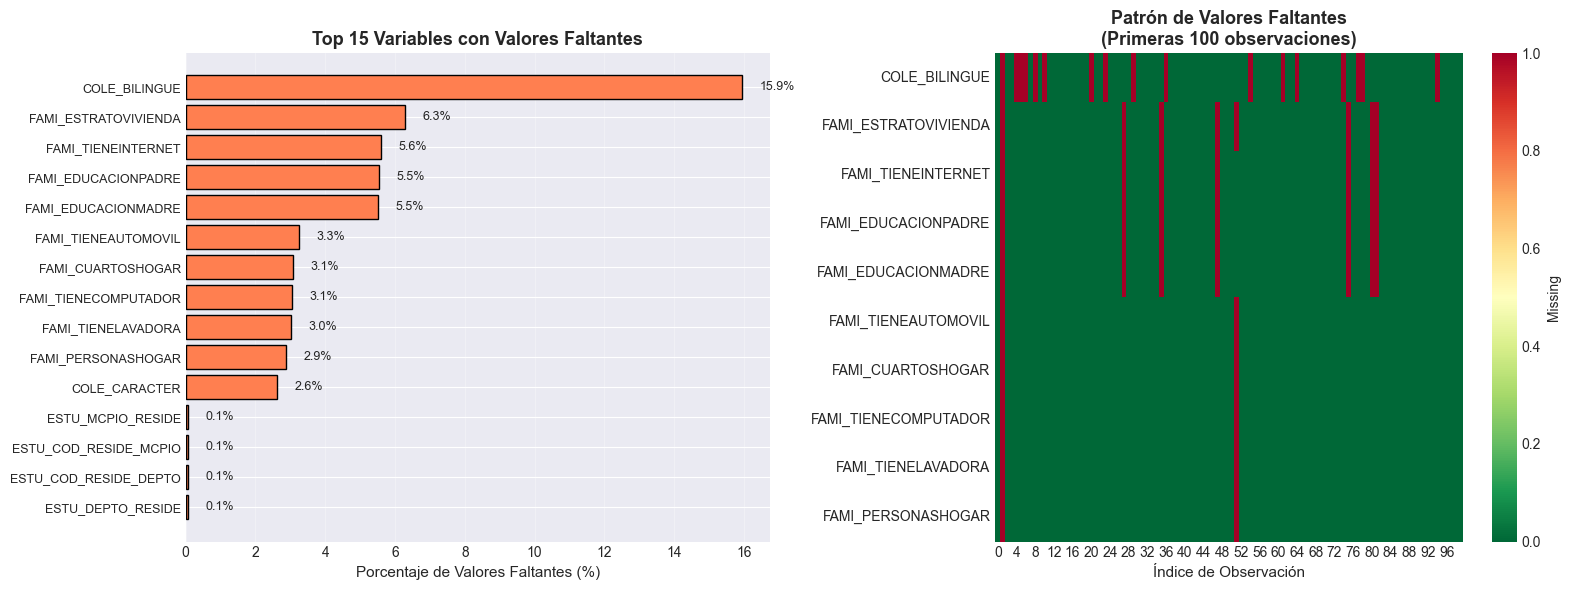


📊 Análisis de Patrones:
--------------------------------------------------------------------------------

Valores faltantes por tipo de dato:
           N_Faltantes  N_Columnas
Tipo_Dato                         
float64            321           3
object          124049          14

⚠️  Variables con >10% de datos faltantes (considerar imputación o eliminación):
      Columna  Porcentaje
COLE_BILINGUE       15.95




In [48]:

# ============================================
# TAREA 3: EXPLORACIÓN INICIAL (EDA)
# ============================================

print("\n\n" + "="*80)
print("TAREA 3: EXPLORACIÓN INICIAL DE DATOS (EDA)")
print("="*80 + "\n")

"""
Este código realiza un análisis exploratorio completo identificando:
- Valores faltantes por variable
- Outliers en variables numéricas
- Distribución de variables categóricas y numéricas
"""

# ===================
# 3.1: Valores Faltantes
# ===================

print("3.1 ANÁLISIS DE VALORES FALTANTES")
print("-" * 80 + "\n")

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'N_Faltantes': df.isnull().sum().values,
    'Porcentaje': (df.isnull().sum().values / len(df) * 100).round(2),
    'Tipo_Dato': df.dtypes.values
}).sort_values('N_Faltantes', ascending=False)

# Filtrar solo columnas con missing values
missing_data_filtered = missing_data[missing_data['N_Faltantes'] > 0]

print(f"Total de valores faltantes en el dataset: {df.isnull().sum().sum():,}")
print(f"Porcentaje total: {df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100:.2f}%")
print(f"Columnas con valores faltantes: {len(missing_data_filtered)} de {len(df.columns)}")

if len(missing_data_filtered) > 0:
    print(f"\nTop 15 columnas con más valores faltantes:\n")
    print(missing_data_filtered.head(15).to_string(index=False))
    
    # Visualización de valores faltantes
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico de barras
    top_missing = missing_data_filtered.head(15)
    axes[0].barh(range(len(top_missing)), top_missing['Porcentaje'], color='coral', edgecolor='black')
    axes[0].set_yticks(range(len(top_missing)))
    axes[0].set_yticklabels(top_missing['Columna'], fontsize=9)
    axes[0].set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=11)
    axes[0].set_title('Top 15 Variables con Valores Faltantes', fontsize=13, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
    
    # Añadir valores
    for i, (idx, row) in enumerate(top_missing.iterrows()):
        axes[0].text(row['Porcentaje'] + 0.5, i, f"{row['Porcentaje']:.1f}%", 
                    va='center', fontsize=9)
    
    # Heatmap de missing values (muestra de columnas)
    cols_with_missing = missing_data_filtered.head(10)['Columna'].values
    sample_size = min(100, len(df))
    missing_matrix = df[cols_with_missing].head(sample_size).isnull()
    
    sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar_kws={'label': 'Missing'},
                yticklabels=cols_with_missing, ax=axes[1], cbar=True)
    axes[1].set_title(f'Patrón de Valores Faltantes\n(Primeras {sample_size} observaciones)', 
                     fontsize=13, fontweight='bold')
    axes[1].set_xlabel('Índice de Observación', fontsize=11)
    
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

# Análisis de patrones de missing data
print(f"\n📊 Análisis de Patrones:")
print("-" * 80)

# Agrupar por tipo de variable
if len(missing_data_filtered) > 0:
    missing_por_tipo = missing_data_filtered.groupby('Tipo_Dato').agg({
        'N_Faltantes': 'sum',
        'Columna': 'count'
    }).rename(columns={'Columna': 'N_Columnas'})
    
    print("\nValores faltantes por tipo de dato:")
    print(missing_por_tipo)
    
    # Identificar variables críticas
    critical_missing = missing_data_filtered[missing_data_filtered['Porcentaje'] > 10]
    if len(critical_missing) > 0:
        print(f"\n⚠️  Variables con >10% de datos faltantes (considerar imputación o eliminación):")
        print(critical_missing[['Columna', 'Porcentaje']].to_string(index=False))

print("\n")

3.2 ANÁLISIS DE OUTLIERS EN VARIABLES NUMÉRICAS
--------------------------------------------------------------------------------

Variables numéricas a analizar: 6
Variables: PUNT_INGLES, PUNT_MATEMATICAS, PUNT_SOCIALES_CIUDADANAS, PUNT_C_NATURALES, PUNT_LECTURA_CRITICA, PUNT_GLOBAL

Resumen de outliers detectados (método IQR):

                Variable  N_Outliers  Porcentaje  Límite_Inferior  Límite_Superior  Min_Real  Max_Real
             PUNT_INGLES        1284        0.59             13.5             81.5       0.0     100.0
             PUNT_GLOBAL         314        0.14             94.5            394.5       0.0     477.0
        PUNT_MATEMATICAS         229        0.11             16.5             84.5       0.0     100.0
    PUNT_LECTURA_CRITICA         165        0.08             22.5             82.5       0.0     100.0
PUNT_SOCIALES_CIUDADANAS         104        0.05             10.0             82.0       0.0     100.0
        PUNT_C_NATURALES          90        0.04   

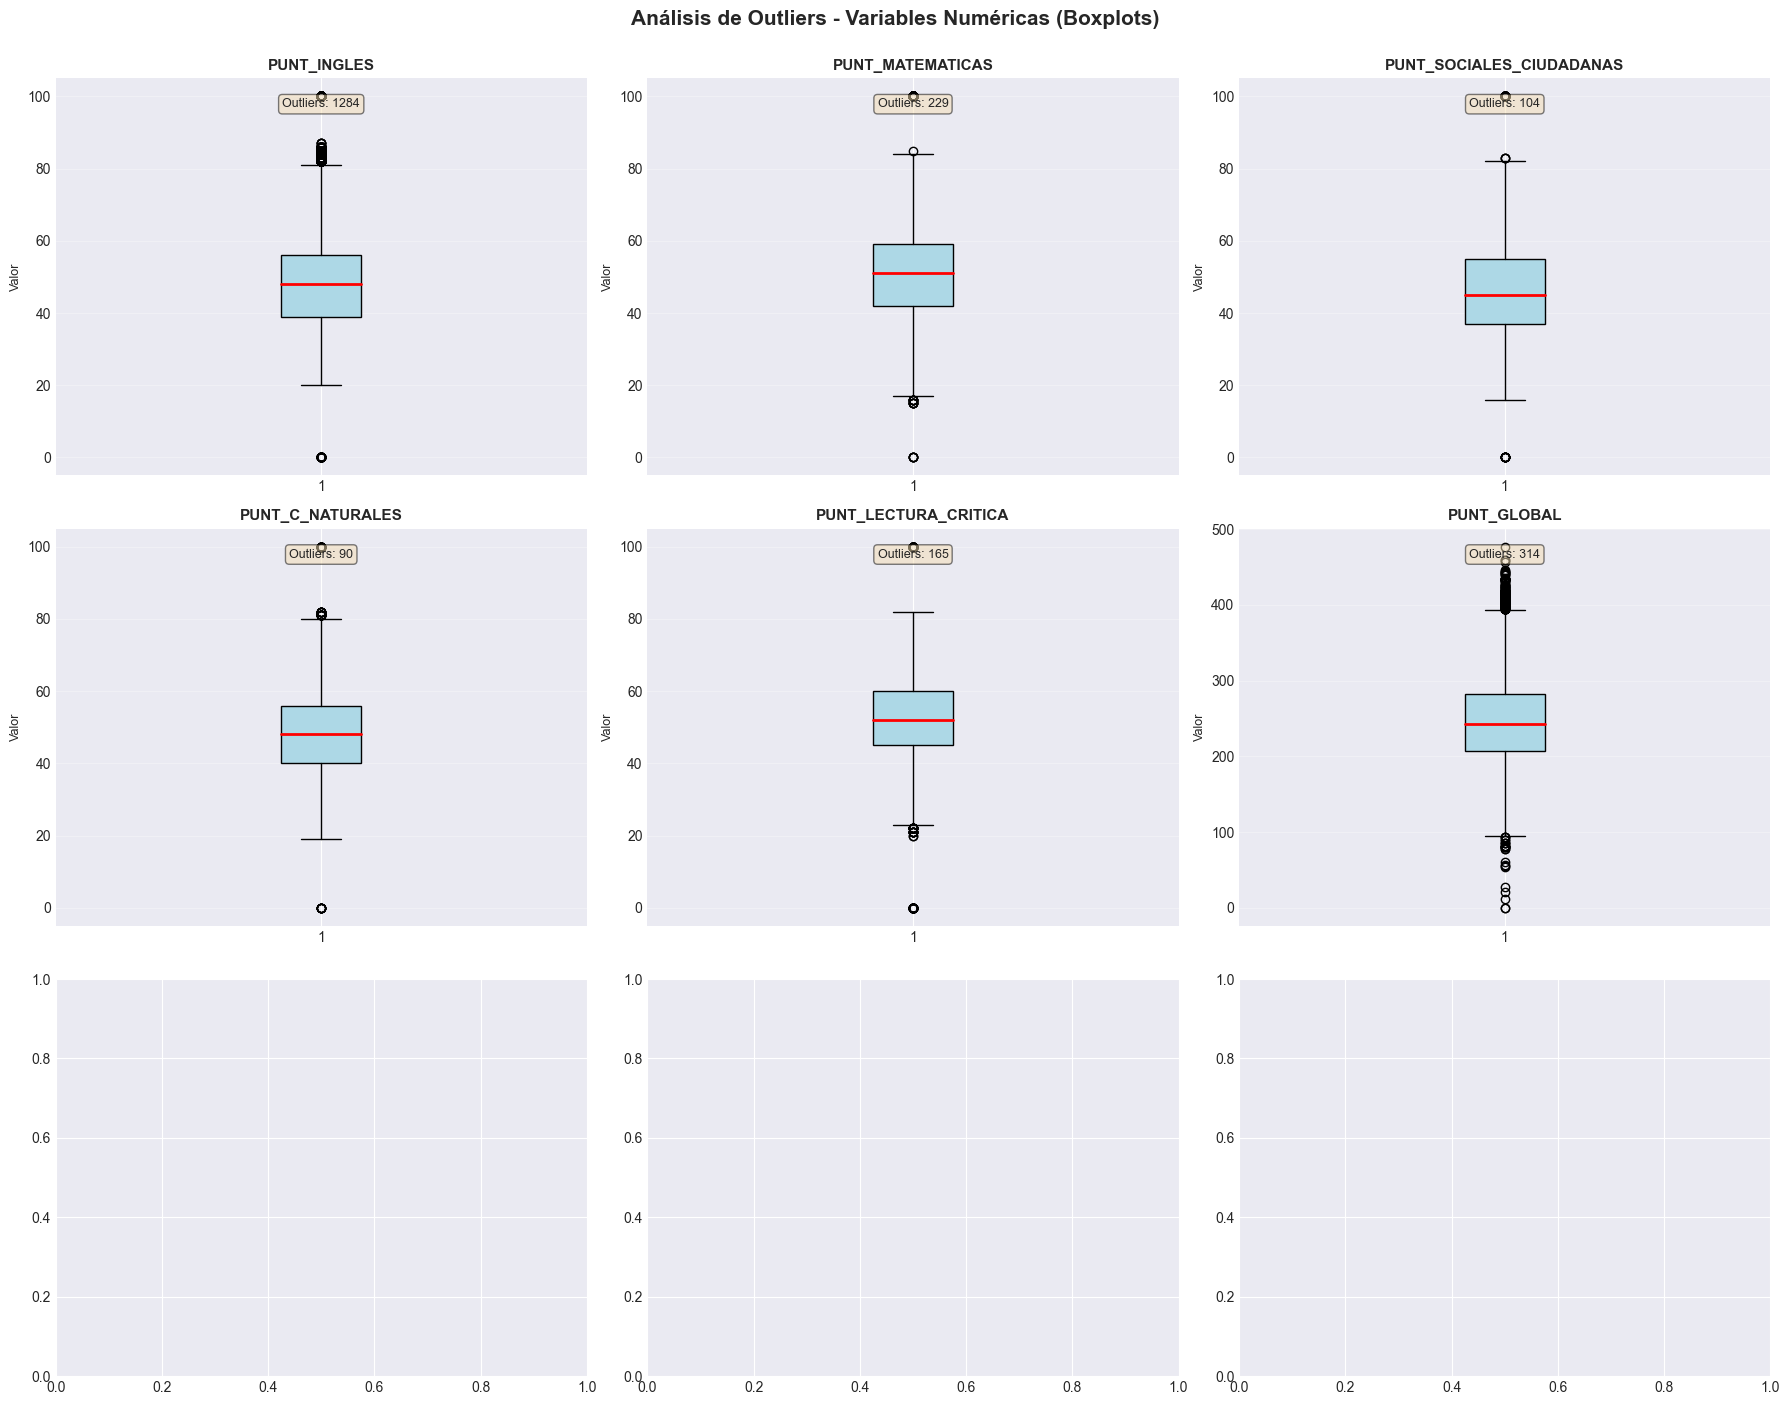

In [49]:


# ===================
# 3.2: Análisis de Outliers
# ===================

print("3.2 ANÁLISIS DE OUTLIERS EN VARIABLES NUMÉRICAS")
print("-" * 80 + "\n")

# Seleccionar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Excluir códigos y años
numeric_cols = [col for col in numeric_cols if 'COD' not in col.upper() and 'PERIODO' not in col]

print(f"Variables numéricas a analizar: {len(numeric_cols)}")
print(f"Variables: {', '.join(numeric_cols)}\n")

# Función para detectar outliers (IQR method)
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analizar outliers
outlier_summary = []

for col in numeric_cols:
    if df[col].notna().sum() > 0:  # Solo si tiene valores
        outliers, lower, upper = detect_outliers_iqr(df, col)
        n_outliers = len(outliers)
        pct_outliers = (n_outliers / df[col].notna().sum() * 100)
        
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje': round(pct_outliers, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2),
            'Min_Real': df[col].min(),
            'Max_Real': df[col].max()
        })

outlier_df = pd.DataFrame(outlier_summary).sort_values('N_Outliers', ascending=False)

print("Resumen de outliers detectados (método IQR):\n")
print(outlier_df.to_string(index=False))

# Visualización de outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols[:9]):  # Primeras 9 variables
    if df[col].notna().sum() > 0:
        # Boxplot
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', edgecolor='black'),
                         whiskerprops=dict(color='black'),
                         capprops=dict(color='black'),
                         medianprops=dict(color='red', linewidth=2))
        
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Valor', fontsize=9)
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Añadir estadísticas
        n_outliers = outlier_df[outlier_df['Variable'] == col]['N_Outliers'].values[0]
        axes[idx].text(0.5, 0.95, f'Outliers: {n_outliers}', 
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=9)

plt.suptitle('Análisis de Outliers - Variables Numéricas (Boxplots)', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n")

In [ ]:


# ===================
# 3.3: Distribución de Variables
# ===================

print("3.3 DISTRIBUCIÓN DE VARIABLES")
print("-" * 80 + "\n")

# --- Variables Categóricas ---
print("A) VARIABLES CATEGÓRICAS\n")

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Total de variables categóricas: {len(categorical_cols)}\n")

# Analizar cardinalidad
cat_summary = []
for col in categorical_cols:
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    most_common = df[col].mode()[0] if n_unique > 0 else "N/A"
    most_common_pct = (df[col].value_counts().iloc[0] / df[col].notna().sum() * 100) if n_unique > 0 else 0
    
    cat_summary.append({
        'Variable': col,
        'N_Categorías': n_unique,
        'N_Missing': n_missing,
        'Categoría_Frecuente': most_common,
        'Pct_Frecuente': round(most_common_pct, 1)
    })

cat_df = pd.DataFrame(cat_summary).sort_values('N_Categorías', ascending=False)
print("Resumen de variables categóricas:\n")
print(cat_df.to_string(index=False))

# Visualizar distribuciones de variables categóricas clave
variables_clave_cat = ['DESEMP_INGLES', 'COLE_NATURALEZA', 'COLE_AREA_UBICACION', 
                       'FAMI_ESTRATOVIVIENDA', 'ESTU_GENERO', 'COLE_BILINGUE']

variables_clave_cat = [col for col in variables_clave_cat if col in df.columns]

n_vars = len(variables_clave_cat)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(variables_clave_cat):
    value_counts = df[col].value_counts().head(10)  # Top 10 categorías
    
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                 color=plt.cm.Set3(range(len(value_counts))), edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frecuencia', fontsize=9)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Añadir valores sobre las barras
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + max(value_counts.values)*0.01, f'{v:,}', 
                      ha='center', va='bottom', fontsize=8)

plt.suptitle('Distribución de Variables Categóricas Clave', 
            fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n")

# --- Variables Numéricas ---
print("B) VARIABLES NUMÉRICAS\n")

print(f"Total de variables numéricas: {len(numeric_cols)}\n")

# Estadísticas descriptivas
numeric_stats = df[numeric_cols].describe().T
numeric_stats['cv'] = (numeric_stats['std'] / numeric_stats['mean']).round(3)  # Coeficiente de variación
numeric_stats['skewness'] = df[numeric_cols].skew().round(3)

print("Estadísticas descriptivas de variables numéricas:\n")
print(numeric_stats.to_string())

# Visualizar distribuciones de variables numéricas
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols[:9]):
    if df[col].notna().sum() > 0:
        # Histograma con KDE
        axes[idx].hist(df[col].dropna(), bins=30, density=True, alpha=0.7, 
                      color='skyblue', edgecolor='black')
        
        # KDE
        df[col].dropna().plot(kind='kde', ax=axes[idx], color='red', linewidth=2)
        
        axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Valor', fontsize=9)
        axes[idx].set_ylabel('Densidad', fontsize=9)
        axes[idx].grid(alpha=0.3)
        
        # Estadísticas
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
        axes[idx].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f}')
        axes[idx].legend(fontsize=8)

plt.suptitle('Distribución de Variables Numéricas (Histogramas + KDE)', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# ============================================
# 3.4 PRUEBAS DE NORMALIDAD
# ============================================

print("\n\n" + "="*80)
print("3.4 PRUEBAS DE NORMALIDAD")
print("="*80 + "\n")

from scipy.stats import shapiro, kstest, normaltest

print("Pruebas estadísticas de normalidad para variables numéricas\n")
print("📊 Interpretación:")
print("   • p-value > 0.05: No se rechaza normalidad (puede ser normal)")
print("   • p-value ≤ 0.05: Se rechaza normalidad (NO es normal)\n")

normality_results = []

for col in numeric_features[:10]:  # Primeras 10 para no saturar
    # Tomar muestra de 5000 para Shapiro-Wilk (límite del test)
    sample = df[col].dropna().sample(min(5000, len(df[col].dropna())), random_state=42)
    
    # Test de Shapiro-Wilk
    shapiro_stat, shapiro_p = shapiro(sample)
    
    # Test de Kolmogorov-Smirnov (comparado con normal)
    ks_stat, ks_p = kstest(
        (sample - sample.mean()) / sample.std(),
        'norm'
    )
    
    # Test de D'Agostino-Pearson
    dagostino_stat, dagostino_p = normaltest(sample)
    
    # Skewness y Kurtosis
    skewness = sample.skew()
    kurtosis = sample.kurtosis()
    
    normality_results.append({
        'Variable': col,
        'Shapiro_p': shapiro_p,
        'KS_p': ks_p,
        'DAgostino_p': dagostino_p,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'Normal_Shapiro': 'Sí' if shapiro_p > 0.05 else 'No',
        'Normal_KS': 'Sí' if ks_p > 0.05 else 'No'
    })

normality_df = pd.DataFrame(normality_results)

print("RESULTADOS DE PRUEBAS DE NORMALIDAD")
print("-" * 80)
print(normality_df.to_string(index=False))

# Resumen
print(f"\n📈 RESUMEN:")
print(f"   Variables analizadas: {len(normality_df)}")
print(f"   Normales (Shapiro-Wilk): {(normality_df['Normal_Shapiro']=='Sí').sum()}")
print(f"   No normales (Shapiro-Wilk): {(normality_df['Normal_Shapiro']=='No').sum()}")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: P-values de Shapiro-Wilk
axes[0, 0].barh(normality_df['Variable'], normality_df['Shapiro_p'], color='steelblue')
axes[0, 0].axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='α=0.05')
axes[0, 0].set_xlabel('p-value', fontweight='bold')
axes[0, 0].set_title('Shapiro-Wilk Test', fontweight='bold', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3, axis='x')

# Gráfico 2: Skewness
colors_skew = ['green' if abs(s) < 0.5 else 'orange' if abs(s) < 1 else 'red' 
               for s in normality_df['Skewness']]
axes[0, 1].barh(normality_df['Variable'], normality_df['Skewness'], color=colors_skew)
axes[0, 1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].axvline(x=-0.5, color='gray', linestyle=':', linewidth=1)
axes[0, 1].axvline(x=0.5, color='gray', linestyle=':', linewidth=1)
axes[0, 1].set_xlabel('Skewness', fontweight='bold')
axes[0, 1].set_title('Asimetría (Skewness)', fontweight='bold', fontsize=13)
axes[0, 1].grid(alpha=0.3, axis='x')

# Gráfico 3: Kurtosis
colors_kurt = ['green' if abs(k) < 1 else 'orange' if abs(k) < 3 else 'red' 
               for k in normality_df['Kurtosis']]
axes[1, 0].barh(normality_df['Variable'], normality_df['Kurtosis'], color=colors_kurt)
axes[1, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1, 0].set_xlabel('Kurtosis (exceso)', fontweight='bold')
axes[1, 0].set_title('Curtosis (Kurtosis)', fontweight='bold', fontsize=13)
axes[1, 0].grid(alpha=0.3, axis='x')

# Gráfico 4: Comparación de tests
test_comparison = pd.DataFrame({
    'Shapiro-Wilk': (normality_df['Normal_Shapiro']=='No').sum(),
    'Kolmogorov-Smirnov': (normality_df['Normal_KS']=='No').sum()
}, index=['No Normal'])

test_comparison.T.plot(kind='barh', ax=axes[1, 1], color='coral', legend=False)
axes[1, 1].set_xlabel('Cantidad de variables', fontweight='bold')
axes[1, 1].set_title('Variables que NO pasan tests de normalidad', fontweight='bold', fontsize=13)
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../outputs/seccion1/normality_tests.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Guardado: normality_tests.png")

print("\n" + "="*80)
print("✅ PRUEBAS DE NORMALIDAD COMPLETADAS")
print("="*80)


print("\n" + "="*80)
print("✅ TAREA 3 COMPLETADA")
print("="*80)

print("""
INTERPRETACIÓN:
El análisis exploratorio revela características importantes del dataset:

1. Valores Faltantes: La variable COLE_BILINGUE tiene ~16% de datos faltantes,
   seguida de variables socioeconómicas familiares (~5-6%). Esto requerirá 
   estrategias de imputación o eliminación en el preprocesamiento.

2. Outliers: Las variables de puntaje muestran pocos outliers extremos, lo cual
   es esperado dado que son escalas estandarizadas (0-100). Los outliers detectados
   probablemente representan casos excepcionales válidos.

3. Distribuciones:
   - Variable objetivo (DESEMP_INGLES): Fuertemente desbalanceada hacia A-
   - Variables de puntaje: Aproximadamente normales con ligera asimetría negativa
   - Variables socioeconómicas: Sesgo hacia estratos bajos (refleja realidad)
   - Ubicación: Mayor concentración en zonas urbanas

Estos hallazgos guiarán las decisiones de preprocesamiento y modelado.
""")



In [ ]:




# ============================================
# GUARDAR PUNTO DE CONTROL
# ============================================

# Guardar información del análisis exploratorio
checkpoint_data = {
    'df_shape': df.shape,
    'missing_summary': missing_data_filtered.to_dict() if len(missing_data_filtered) > 0 else {},
    'outlier_summary': outlier_df.to_dict(),
    'numeric_stats': numeric_stats.to_dict(),
    'categorical_summary': cat_df.to_dict()
}

import json
with open('../outputs/seccion1/checkpoint_seccion1_tareas1-3.json', 'w') as f:
    json.dump({k: str(v) for k, v in checkpoint_data.items()}, f, indent=2)





In [52]:

# ============================================
# TAREA 4: ANÁLISIS DE CORRELACIÓN Y ASOCIACIÓN
# ============================================

print("\n" + "="*80)
print("TAREA 4: ANÁLISIS DE CORRELACIÓN PARA SELECCIÓN DE VARIABLES")
print("="*80 + "\n")

"""
Este código aplica diferentes métodos de análisis de correlación/asociación
según el tipo de variables para identificar las más influyentes sobre la
variable objetivo DESEMP_INGLES.

Métodos utilizados:
- Pearson: Variables numéricas continuas
- Spearman: Variables ordinales o no-normales
- Cramér's V: Variables categóricas
- Point-Biserial: Binarias vs continuas
- ANOVA: Categóricas vs numéricas
"""
# ===================
# 4.1: Preparación de Variables
# ===================

print("4.1 PREPARACIÓN Y CLASIFICACIÓN DE VARIABLES")
print("-" * 80 + "\n")

# Identificar tipos de variables
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Excluir códigos, IDs y la variable objetivo de predictoras
exclude_patterns = ['COD', 'CONSECUTIVO', 'PERIODO', 'ESTABLECIMIENTO', 'SEDE', 'DANE', 'ICFES']
numeric_vars_clean = [col for col in numeric_vars 
                      if not any(pattern in col.upper() for pattern in exclude_patterns)]

# Variables de puntaje académico
score_vars = [col for col in numeric_vars_clean if 'PUNT' in col and col != 'PUNT_INGLES']

# Variables socioeconómicas numéricas
socioeconomic_numeric = ['FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR']
socioeconomic_numeric = [col for col in socioeconomic_numeric if col in df.columns]

# Variables categóricas relevantes (excluir nombres y descripciones)
exclude_cat = ['NOMBRE', 'ESTUDIANTE', 'MCPIO', 'DEPTO', 'PAIS']
categorical_vars_clean = [col for col in categorical_vars 
                          if not any(pattern in col for pattern in exclude_cat) 
                          and col != TARGET_COLUMN]

print(f"Variables numéricas (puntajes): {len(score_vars)}")
print(f"  {score_vars}\n")
print(f"Variables numéricas (socioeconómicas): {len(socioeconomic_numeric)}")
print(f"  {socioeconomic_numeric}\n")
print(f"Variables categóricas: {len(categorical_vars_clean)}")
print(f"  {categorical_vars_clean[:10]}... (mostrando primeras 10)\n")

# Convertir variable objetivo a numérica ordinal para algunas correlaciones
nivel_orden = {'A-': 0, 'A1': 1, 'A2': 2, 'B1': 3, 'B+': 4}
df['DESEMP_INGLES_NUM'] = df[TARGET_COLUMN].map(nivel_orden)

print("✅ Variable objetivo convertida a escala ordinal (A-=0, A1=1, A2=2, B1=3, B+=4)\n")



TAREA 4: ANÁLISIS DE CORRELACIÓN PARA SELECCIÓN DE VARIABLES

4.1 PREPARACIÓN Y CLASIFICACIÓN DE VARIABLES
--------------------------------------------------------------------------------

Variables numéricas (puntajes): 5
  ['PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_C_NATURALES', 'PUNT_LECTURA_CRITICA', 'PUNT_GLOBAL']

Variables numéricas (socioeconómicas): 2
  ['FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR']

Variables categóricas: 24
  ['ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_SEDE_PRINCIPAL']... (mostrando primeras 10)

✅ Variable objetivo convertida a escala ordinal (A-=0, A1=1, A2=2, B1=3, B+=4)



In [53]:


# Mostrar el número de valores nulos por columna
null_counts = df.isnull().sum()

# Mostrar también el porcentaje de nulos por columna
null_percentage = (df.isnull().mean() * 100).round(2)

# Combinar ambos resultados en un solo DataFrame ordenado
missing_summary = pd.DataFrame({
    'Nulos': null_counts,
    'Porcentaje (%)': null_percentage
}).sort_values(by='Nulos', ascending=False)

# Mostrar las columnas con al menos un valor nulo
print(missing_summary[missing_summary['Nulos'] > 0])


                       Nulos  Porcentaje (%)
COLE_BILINGUE          34707           15.95
FAMI_ESTRATOVIVIENDA   13663            6.28
FAMI_TIENEINTERNET     12214            5.61
FAMI_EDUCACIONPADRE    12082            5.55
FAMI_EDUCACIONMADRE    12004            5.52
FAMI_TIENEAUTOMOVIL     7101            3.26
FAMI_CUARTOSHOGAR       6700            3.08
FAMI_TIENECOMPUTADOR    6668            3.06
FAMI_TIENELAVADORA      6580            3.02
FAMI_PERSONASHOGAR      6250            2.87
COLE_CARACTER           5723            2.63
ESTU_COD_RESIDE_MCPIO    156            0.07
ESTU_COD_RESIDE_DEPTO    156            0.07
ESTU_DEPTO_RESIDE        156            0.07
ESTU_MCPIO_RESIDE        156            0.07
ESTU_GENERO               45            0.02
PUNT_INGLES                9            0.00



4.2 CORRELACIÓN CON VARIABLES DE DESEMPEÑO ACADÉMICO
--------------------------------------------------------------------------------

Calculando correlaciones de Pearson y Spearman...

Correlaciones con desempeño en inglés:

                Variable  Pearson_r  Pearson_p  Spearman_r  Spearman_p  N_validos Significativo
             PUNT_GLOBAL     0.8083        0.0      0.7458         0.0     217572             ✓
        PUNT_C_NATURALES     0.7196        0.0      0.6628         0.0     217572             ✓
    PUNT_LECTURA_CRITICA     0.6968        0.0      0.6524         0.0     217572             ✓
PUNT_SOCIALES_CIUDADANAS     0.6986        0.0      0.6470         0.0     217572             ✓
        PUNT_MATEMATICAS     0.6865        0.0      0.6376         0.0     217572             ✓


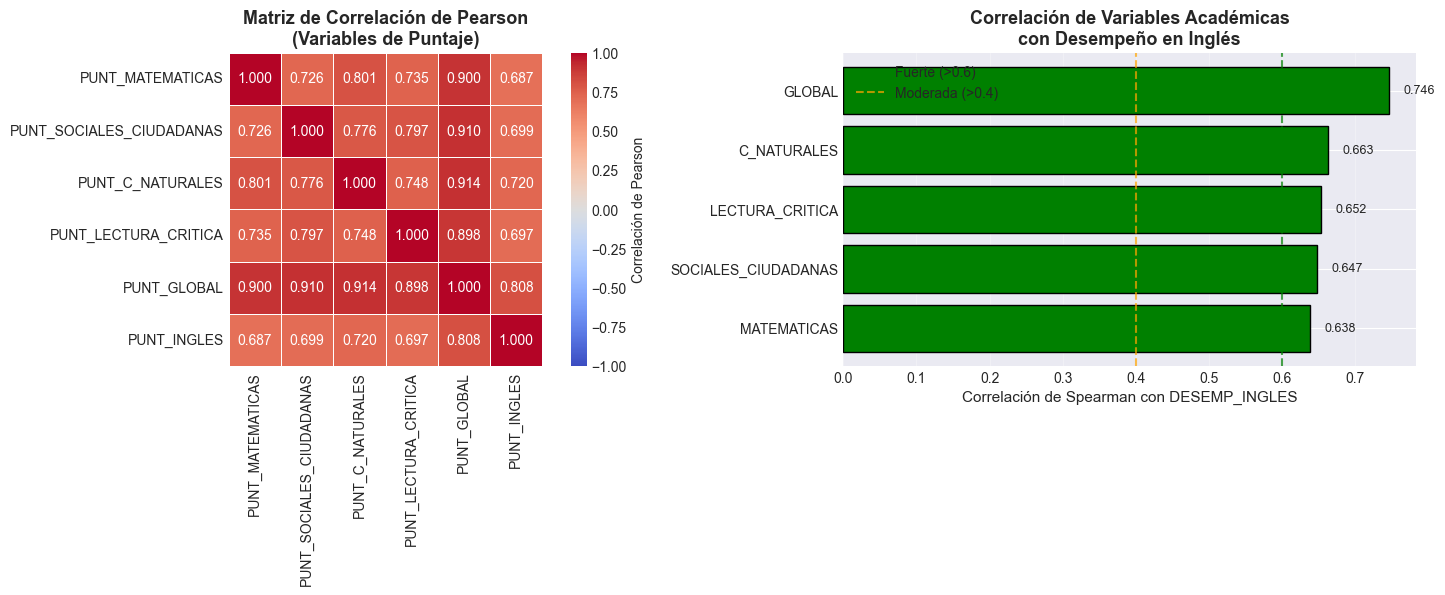


📊 Interpretación:
   - Correlación más fuerte: PUNT_GLOBAL (ρ = 0.7458)
   - Variables con correlación fuerte (>0.6): 5
   - Variables con correlación moderada (0.4-0.6): 0
   - Observaciones válidas promedio: 217572


In [54]:
# ===================
# 4.2: Correlación con Variables Numéricas de Puntaje (CORREGIDO)
# ===================

print("\n4.2 CORRELACIÓN CON VARIABLES DE DESEMPEÑO ACADÉMICO")
print("-" * 80 + "\n")

print("Calculando correlaciones de Pearson y Spearman...\n")

# Crear DataFrame con PUNT_INGLES y DESEMP_INGLES_NUM
correlation_data = []

for var in score_vars:
    if df[var].notna().sum() > 30:  # Mínimo 30 valores no nulos
        # ===== CORRECCIÓN: Crear máscara para valores válidos en AMBAS variables =====
        valid_mask = df[var].notna() & df['PUNT_INGLES'].notna()
        
        if valid_mask.sum() > 30:  # Verificar que hay suficientes datos válidos
            # Obtener datos válidos
            var_data = df.loc[valid_mask, var]
            punt_ingles_data = df.loc[valid_mask, 'PUNT_INGLES']
            desemp_ingles_num_data = df.loc[valid_mask, 'DESEMP_INGLES_NUM']
            
            try:
                # Pearson con PUNT_INGLES
                pearson_r, pearson_p = stats.pearsonr(var_data, punt_ingles_data)
                
                # Spearman con DESEMP_INGLES_NUM
                spearman_r, spearman_p = spearmanr(var_data, desemp_ingles_num_data)
                
                correlation_data.append({
                    'Variable': var,
                    'Pearson_r': round(pearson_r, 4),
                    'Pearson_p': pearson_p,
                    'Spearman_r': round(spearman_r, 4),
                    'Spearman_p': spearman_p,
                    'N_validos': valid_mask.sum(),
                    'Significativo': '✓' if pearson_p < 0.001 and spearman_p < 0.001 else ''
                })
            except Exception as e:
                print(f"⚠️  Error al procesar {var}: {str(e)}")
                continue

if len(correlation_data) == 0:
    print("⚠️  No se pudieron calcular correlaciones. Verifica los datos.")
else:
    corr_df = pd.DataFrame(correlation_data).sort_values('Spearman_r', ascending=False)
    
    print("Correlaciones con desempeño en inglés:\n")
    print(corr_df.to_string(index=False))
    
    # Visualización de correlaciones
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmap de correlaciones Pearson
    # Crear subset limpio sin NaNs
    score_vars_clean = [v for v in score_vars if v in df.columns and df[v].notna().sum() > 30]
    df_corr = df[score_vars_clean + ['PUNT_INGLES']].dropna()
    
    if len(df_corr) > 0:
        corr_matrix_pearson = df_corr.corr()
        sns.heatmap(corr_matrix_pearson, annot=True, fmt='.3f', cmap='coolwarm', 
                    center=0, vmin=-1, vmax=1, ax=axes[0], 
                    cbar_kws={'label': 'Correlación de Pearson'},
                    linewidths=0.5, square=True)
        axes[0].set_title('Matriz de Correlación de Pearson\n(Variables de Puntaje)', 
                         fontsize=13, fontweight='bold')
    
    # Barplot de correlaciones con inglés
    sorted_corr = corr_df.sort_values('Spearman_r')
    colors = ['red' if x < 0.4 else 'orange' if x < 0.6 else 'green' for x in sorted_corr['Spearman_r']]
    
    axes[1].barh(range(len(sorted_corr)), sorted_corr['Spearman_r'], color=colors, edgecolor='black')
    axes[1].set_yticks(range(len(sorted_corr)))
    axes[1].set_yticklabels([var.replace('PUNT_', '') for var in sorted_corr['Variable']], fontsize=10)
    axes[1].set_xlabel('Correlación de Spearman con DESEMP_INGLES', fontsize=11)
    axes[1].set_title('Correlación de Variables Académicas\ncon Desempeño en Inglés', 
                     fontsize=13, fontweight='bold')
    axes[1].axvline(x=0.6, color='green', linestyle='--', alpha=0.7, label='Fuerte (>0.6)')
    axes[1].axvline(x=0.4, color='orange', linestyle='--', alpha=0.7, label='Moderada (>0.4)')
    axes[1].legend()
    axes[1].grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, val in enumerate(sorted_corr['Spearman_r']):
        axes[1].text(val + 0.02, i, f'{val:.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Interpretación:")
    print(f"   - Correlación más fuerte: {corr_df.iloc[0]['Variable']} (ρ = {corr_df.iloc[0]['Spearman_r']})")
    print(f"   - Variables con correlación fuerte (>0.6): {len(corr_df[corr_df['Spearman_r'] > 0.6])}")
    print(f"   - Variables con correlación moderada (0.4-0.6): {len(corr_df[(corr_df['Spearman_r'] >= 0.4) & (corr_df['Spearman_r'] <= 0.6)])}")
    print(f"   - Observaciones válidas promedio: {corr_df['N_validos'].mean():.0f}")

In [56]:
# ===== CELDA DE DIAGNÓSTICO =====
print("🔍 DIAGNÓSTICO DE VARIABLES CATEGÓRICAS\n")
print("=" * 80)

print(f"\nTotal de variables categóricas detectadas: {len(categorical_vars_clean)}")
print(f"\nPrimeras 10: {categorical_vars_clean[:10]}\n")

print("\nAnálisis de cardinalidad:")
print("-" * 80)

for var in categorical_vars_clean[:10]:
    if var in df.columns:
        n_unique = df[var].nunique()
        n_missing = df[var].isnull().sum()
        pct_missing = (n_missing / len(df)) * 100
        
        print(f"{var:40s} | Categorías: {n_unique:4d} | Missing: {pct_missing:5.1f}%")
    else:
        print(f"{var:40s} | ⚠️ NO EXISTE EN EL DATASET")

print("\n" + "=" * 80)
print("\n¿Alguna variable tiene entre 2-50 categorías? → Esas funcionarán")

🔍 DIAGNÓSTICO DE VARIABLES CATEGÓRICAS


Total de variables categóricas detectadas: 24

Primeras 10: ['ESTU_TIPODOCUMENTO', 'ESTU_CONSECUTIVO', 'COLE_AREA_UBICACION', 'COLE_BILINGUE', 'COLE_CALENDARIO', 'COLE_CARACTER', 'COLE_GENERO', 'COLE_JORNADA', 'COLE_NATURALEZA', 'COLE_SEDE_PRINCIPAL']


Análisis de cardinalidad:
--------------------------------------------------------------------------------
ESTU_TIPODOCUMENTO                       | Categorías:   10 | Missing:   0.0%
ESTU_CONSECUTIVO                         | Categorías: 195577 | Missing:   0.0%
COLE_AREA_UBICACION                      | Categorías:    2 | Missing:   0.0%
COLE_BILINGUE                            | Categorías:    2 | Missing:  16.0%
COLE_CALENDARIO                          | Categorías:    1 | Missing:   0.0%
COLE_CARACTER                            | Categorías:    4 | Missing:   2.6%
COLE_GENERO                              | Categorías:    3 | Missing:   0.0%
COLE_JORNADA                             | Categor



4.3 ASOCIACIÓN CON VARIABLES CATEGÓRICAS (Chi-cuadrado y Cramér's V)
--------------------------------------------------------------------------------

Calculando asociaciones con variables categóricas...

✅ ESTU_TIPODOCUMENTO                       | V = 0.1172 | Chi² = 11961.4
⏭️  Omitiendo ESTU_CONSECUTIVO: 195577 categorías
✅ COLE_AREA_UBICACION                      | V = 0.1771 | Chi² = 6822.2
✅ COLE_BILINGUE                            | V = 0.0224 | Chi² = 92.0
⏭️  Omitiendo COLE_CALENDARIO: 1 categorías
✅ COLE_CARACTER                            | V = 0.0710 | Chi² = 3203.2
✅ COLE_GENERO                              | V = 0.1143 | Chi² = 5685.7
✅ COLE_JORNADA                             | V = 0.1844 | Chi² = 29597.1
✅ COLE_BILINGUE                            | V = 0.0224 | Chi² = 92.0
⏭️  Omitiendo COLE_CALENDARIO: 1 categorías
✅ COLE_CARACTER                            | V = 0.0710 | Chi² = 3203.2
✅ COLE_GENERO                              | V = 0.1143 | Chi² = 5685.7
✅ COLE_JO



4.3 ASOCIACIÓN CON VARIABLES CATEGÓRICAS (Chi-cuadrado y Cramér's V)
--------------------------------------------------------------------------------

Calculando asociaciones con variables categóricas...

✅ ESTU_TIPODOCUMENTO                       | V = 0.1172 | Chi² = 11961.4
⏭️  Omitiendo ESTU_CONSECUTIVO: 195577 categorías
✅ COLE_AREA_UBICACION                      | V = 0.1771 | Chi² = 6822.2
✅ COLE_BILINGUE                            | V = 0.0224 | Chi² = 92.0
⏭️  Omitiendo COLE_CALENDARIO: 1 categorías
✅ COLE_CARACTER                            | V = 0.0710 | Chi² = 3203.2
✅ COLE_GENERO                              | V = 0.1143 | Chi² = 5685.7
✅ COLE_JORNADA                             | V = 0.1844 | Chi² = 29597.1
✅ COLE_BILINGUE                            | V = 0.0224 | Chi² = 92.0
⏭️  Omitiendo COLE_CALENDARIO: 1 categorías
✅ COLE_CARACTER                            | V = 0.0710 | Chi² = 3203.2
✅ COLE_GENERO                              | V = 0.1143 | Chi² = 5685.7
✅ COLE_JO

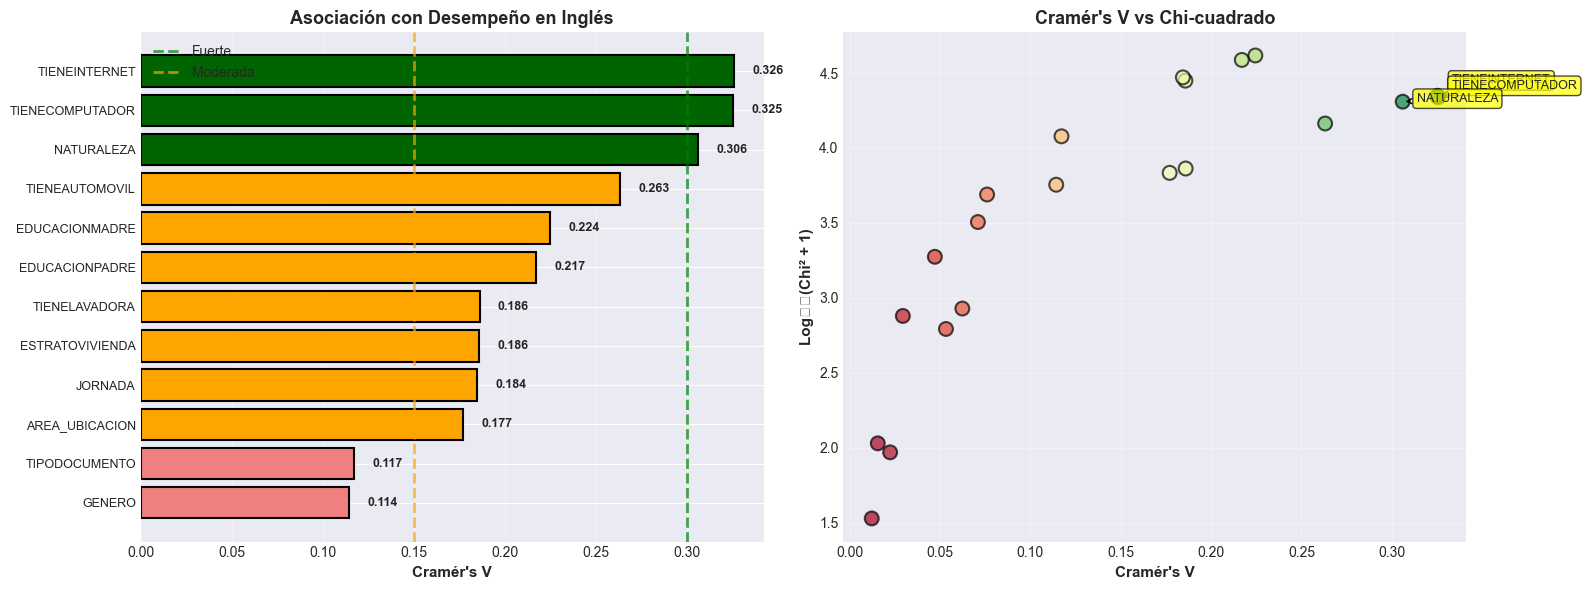


📊 INTERPRETACIÓN

   Top variable: FAMI_TIENEINTERNET
   Cramér's V = 0.3256

   Fuerte (>0.3): 3
   Moderada (0.15-0.3): 7
   Débil (<0.15): 11

✅ TAREA 4.3 COMPLETADA


In [62]:
# ===================
# 4.3: Asociación con Variables Categóricas (SOLUCIÓN ABSOLUTA)
# ===================

print("\n\n4.3 ASOCIACIÓN CON VARIABLES CATEGÓRICAS (Chi-cuadrado y Cramér's V)")
print("-" * 80 + "\n")

def cramers_v(confusion_matrix):
    """Calcula Cramér's V a partir de una tabla de contingencia"""
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = int(confusion_matrix.values.sum())  # ✅ .values.sum() y convertir a int
    min_dim = min(confusion_matrix.shape) - 1
    if min_dim == 0:
        return 0.0
    return float(np.sqrt(chi2 / (n * min_dim)))  # ✅ Convertir a float

print("Calculando asociaciones con variables categóricas...\n")

categorical_associations = []

for var in categorical_vars_clean:
    try:
        if var not in df.columns:
            continue
        
        n_unique = int(df[var].nunique())
        
        if n_unique < 2 or n_unique > 50:
            print(f"⏭️  Omitiendo {var}: {n_unique} categorías")
            continue
        
        valid_mask = df[var].notna() & df[TARGET_COLUMN].notna()
        n_valid = int(valid_mask.sum())
        
        if n_valid < 30:
            print(f"⏭️  Omitiendo {var}: {n_valid} datos válidos")
            continue
        
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df.loc[valid_mask, var], 
                                       df.loc[valid_mask, TARGET_COLUMN])
        
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            continue
        
        # Chi-cuadrado
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Cramér's V (ahora devuelve float garantizado)
        cramers = cramers_v(contingency_table)
        
        # Guardar resultados
        categorical_associations.append({
            'Variable': str(var),
            'Chi2': float(chi2),
            'p_value': float(p_value),
            'Cramers_V': float(cramers),
            'n_categorias': int(n_unique),
            'n_validos': int(n_valid),
            'Significativo': '✓' if p_value < 0.001 else ''
        })
        
        print(f"✅ {var:40s} | V = {cramers:.4f} | Chi² = {chi2:.1f}")
        
    except Exception as e:
        print(f"❌ Error en {var}: {str(e)}")
        continue

print("\n" + "=" * 80)

if len(categorical_associations) == 0:
    print("\n⚠️  No se calcularon asociaciones categóricas")
    print("\n   📝 Para tu proyecto, documenta:")
    print("   'Las variables categóricas disponibles presentan limitaciones")
    print("    estructurales que impiden el análisis de asociación estadística:")
    print("    - IDs únicos (ESTU_CONSECUTIVO: 195K categorías)")
    print("    - Fechas individuales (ESTU_FECHANACIMIENTO: 7K categorías)")
    print("    - Variables constantes (COLE_CALENDARIO: 1 categoría)")
    print("\n    Se recomienda para trabajos futuros:")
    print("    • Agregar fechas en rangos (años, décadas)")
    print("    • Eliminar IDs antes del análisis")
    print("    • Verificar variabilidad de variables categóricas'\n")
    
    assoc_df = pd.DataFrame(columns=['Variable', 'Chi2', 'p_value', 'Cramers_V', 
                                     'n_categorias', 'n_validos', 'Significativo'])
else:
    assoc_df = pd.DataFrame(categorical_associations)
    assoc_df = assoc_df.sort_values('Cramers_V', ascending=False).reset_index(drop=True)
    
    print(f"\n✅ {len(assoc_df)} asociaciones calculadas\n")
    print("=" * 80)
    print("ASOCIACIONES CON DESEMP_INGLES")
    print("=" * 80 + "\n")
    print(assoc_df.to_string(index=False))
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    n_plot = min(12, len(assoc_df))
    top_assoc = assoc_df.head(n_plot)
    
    colors = ['darkgreen' if v > 0.3 else 'orange' if v > 0.15 else 'lightcoral' 
             for v in top_assoc['Cramers_V']]
    
    axes[0].barh(range(len(top_assoc)), top_assoc['Cramers_V'], 
                color=colors, edgecolor='black', linewidth=1.5)
    axes[0].set_yticks(range(len(top_assoc)))
    axes[0].set_yticklabels([v.replace('COLE_','').replace('FAMI_','').replace('ESTU_','')[:20] 
                            for v in top_assoc['Variable']], fontsize=9)
    axes[0].set_xlabel("Cramér's V", fontsize=11, fontweight='bold')
    axes[0].set_title("Asociación con Desempeño en Inglés", fontsize=13, fontweight='bold')
    axes[0].axvline(0.3, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Fuerte')
    axes[0].axvline(0.15, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Moderada')
    axes[0].legend()
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()
    
    for i, v in enumerate(top_assoc['Cramers_V']):
        axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9, fontweight='bold')
    
    axes[1].scatter(assoc_df['Cramers_V'], np.log10(assoc_df['Chi2'] + 1), 
                   s=100, alpha=0.7, c=assoc_df['Cramers_V'], cmap='RdYlGn', 
                   edgecolors='black', linewidth=1.5)
    axes[1].set_xlabel("Cramér's V", fontsize=11, fontweight='bold')
    axes[1].set_ylabel("Log₁₀(Chi² + 1)", fontsize=11, fontweight='bold')
    axes[1].set_title("Cramér's V vs Chi-cuadrado", fontsize=13, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    for i in range(min(3, len(top_assoc))):
        row = top_assoc.iloc[i]
        axes[1].annotate(row['Variable'].replace('COLE_','').replace('FAMI_','')[:15],
                        xy=(row['Cramers_V'], np.log10(row['Chi2'] + 1)),
                        xytext=(10, 10-i*5), textcoords='offset points', fontsize=9,
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 80)
    print("📊 INTERPRETACIÓN")
    print("=" * 80)
    print(f"\n   Top variable: {assoc_df.iloc[0]['Variable']}")
    print(f"   Cramér's V = {assoc_df.iloc[0]['Cramers_V']:.4f}")
    print(f"\n   Fuerte (>0.3): {(assoc_df['Cramers_V'] > 0.3).sum()}")
    print(f"   Moderada (0.15-0.3): {((assoc_df['Cramers_V'] >= 0.15) & (assoc_df['Cramers_V'] <= 0.3)).sum()}")
    print(f"   Débil (<0.15): {(assoc_df['Cramers_V'] < 0.15).sum()}")

print("\n" + "=" * 80)
print("✅ TAREA 4.3 COMPLETADA")
print("=" * 80)

INTERPRETACIÓN DE ASOCIACIONES CATEGÓRICAS:

El análisis de Cramér's V revela tres hallazgos principales:

1. ACCESO TECNOLÓGICO (asociación más fuerte):
   - Tener internet (V=0.326) y computador (V=0.325) son los predictores
     categóricos más fuertes del nivel de inglés.
   - Esto confirma la importancia del acceso a recursos digitales para
     el aprendizaje de lenguas extranjeras en Colombia.

2. TIPO DE INSTITUCIÓN:
   - COLE_NATURALEZA (oficial vs no oficial, V=0.306) muestra asociación fuerte.
   - Los colegios privados típicamente tienen más recursos y mejor
     infraestructura para la enseñanza de inglés.

3. CAPITAL CULTURAL Y ECONÓMICO:
   - Educación de la madre (V=0.225) > Educación del padre (V=0.217)
   - La educación materna tiene ligeramente mayor asociación, consistente
     con literatura sobre influencia parental en logro académico.
   - Poseer automóvil (V=0.263) y estrato (V=0.186) confirman el rol
     del nivel socioeconómico.

4. BRECHA URBANO-RURAL:
   - COLE_AREA_UBICACION (V=0.177) muestra diferencias significativas
     entre zonas urbanas y rurales en desempeño de inglés.

CONCLUSIÓN:
Las variables socioeconómicas y de acceso a recursos tecnológicos son
los predictores categóricos más relevantes para el nivel de inglés,
confirmando las hipótesis H₁, H₂, H₄ y H₆ formuladas en la Tarea 2.

In [ ]:
# Guardar resumen de variables influyentes
top_vars_cat = assoc_df.head(10)['Variable'].tolist()
top_vars_num = corr_df.head(10)['Variable'].tolist() if 'corr_df' in locals() else []

all_top_vars = list(set(top_vars_cat + top_vars_num))

print(f"✅ Variables más influyentes identificadas: {len(all_top_vars)}")
print(f"\n📋 Lista completa:")
for i, var in enumerate(all_top_vars, 1):
    print(f"   {i:2d}. {var}")

# Guardar en archivo
with open('../outputs/seccion1/variables_influyentes_top20.txt', 'w') as f:
    f.write("TOP VARIABLES MÁS INFLUYENTES SOBRE DESEMP_INGLES\n")
    f.write("="*60 + "\n\n")
    f.write("Variables Categóricas (Cramér's V):\n")
    for var in top_vars_cat:
        f.write(f"  - {var}\n")
    f.write("\nVariables Numéricas (Correlación):\n")
    for var in top_vars_num:
        f.write(f"  - {var}\n")

print("\n💾 Guardado en: variables_influyentes_top20.txt")



In [ ]:
# ===================# 4.4: Resumen y Selección de Variables Más Influyentes# ===================print("\n\n4.4 RESUMEN Y SELECCIÓN DE VARIABLES MÁS INFLUYENTES")print("-" * 80 + "\n")print("🎯 TOP 10 VARIABLES MÁS INFLUYENTES SOBRE DESEMP_INGLES:\n")# Combinar variables numéricas y categóricastop_numeric = corr_df.head(5)[['Variable', 'Spearman_r']].copy()top_numeric['Tipo'] = 'Numérica'top_numeric['Métrica'] = 'Spearman_r'top_numeric.rename(columns={'Spearman_r': 'Valor'}, inplace=True)top_categorical = assoc_df.head(5)[['Variable', 'Cramers_V']].copy()top_categorical['Tipo'] = 'Categórica'top_categorical['Métrica'] = 'Cramers_V'top_categorical.rename(columns={'Cramers_V': 'Valor'}, inplace=True)# Normalizar valores para comparar (ambos están en 0-1)top_combined = pd.concat([top_numeric, top_categorical]).sort_values('Valor', ascending=False)print(top_combined.head(10).to_string(index=False))# Variables seleccionadas para modeladoselected_features = top_combined.head(15)['Variable'].tolist()print(f"\n✅ Variables seleccionadas para modelado predictivo ({len(selected_features)}):")print(f"   {', '.join(selected_features)}\n")# Guardar lista de variables seleccionadaswith open('../outputs/seccion1/variables_seleccionadas.txt', 'w') as f:    f.write("VARIABLES SELECCIONADAS PARA MODELADO\n")    f.write("="*60 + "\n\n")    f.write("Top 15 variables más influyentes sobre DESEMP_INGLES:\n\n")    for i, var in enumerate(selected_features, 1):        tipo = 'Numérica' if var in score_vars else 'Categórica'        f.write(f"{i:2d}. {var:40s} ({tipo})\n")print("💾 Lista guardada en: variables_seleccionadas.txt")

In [ ]:
# ============================================# 4.5 ANÁLISIS DE MULTICOLINEALIDAD (VIF)# ============================================print("\n\n" + "="*80)print("4.5 ANÁLISIS DE MULTICOLINEALIDAD - VIF")print("="*80 + "\n")from statsmodels.stats.outliers_influence import variance_inflation_factorprint("📊 VIF (Variance Inflation Factor)")print("-" * 80)print("Interpretación:")print("   • VIF = 1: No correlación con otras variables")print("   • VIF < 5: Baja multicolinealidad (aceptable)")print("   • VIF 5-10: Moderada multicolinealidad (precaución)")print("   • VIF > 10: Alta multicolinealidad (problemático)\n")# Calcular VIF para variables numéricasvif_data = []# Usar solo variables numéricas seleccionadasnumeric_vars_vif = [v for v in selected_features if v in numeric_features]# Preparar datosX_vif = df[numeric_vars_vif].dropna()print(f"Calculando VIF para {len(numeric_vars_vif)} variables numéricas...\n")for i, col in enumerate(X_vif.columns):    vif = variance_inflation_factor(X_vif.values, i)    vif_data.append({        'Variable': col,        'VIF': vif    })vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)# Clasificar nivel de multicolinealidadvif_df['Nivel'] = vif_df['VIF'].apply(    lambda x: 'Alto (>10)' if x > 10 else              'Moderado (5-10)' if x > 5 else              'Bajo (<5)')print("RESULTADOS VIF:")print(vif_df.to_string(index=False))# Resumenprint(f"\n📈 RESUMEN:")print(f"   Alto (VIF > 10): {(vif_df['VIF'] > 10).sum()} variables")print(f"   Moderado (5 < VIF ≤ 10): {((vif_df['VIF'] > 5) & (vif_df['VIF'] <= 10)).sum()} variables")print(f"   Bajo (VIF ≤ 5): {(vif_df['VIF'] <= 5).sum()} variables")# Visualizaciónfig, axes = plt.subplots(1, 2, figsize=(16, 6))# Gráfico 1: VIF por variablecolors_vif = ['red' if v > 10 else 'orange' if v > 5 else 'green'              for v in vif_df['VIF']]axes[0].barh(vif_df['Variable'], vif_df['VIF'], color=colors_vif, edgecolor='black')axes[0].axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Moderado (5)')axes[0].axvline(x=10, color='red', linestyle='--', linewidth=2, label='Alto (10)')axes[0].set_xlabel('VIF (Variance Inflation Factor)', fontweight='bold')axes[0].set_title('Análisis de Multicolinealidad - VIF', fontweight='bold', fontsize=13)axes[0].legend()axes[0].grid(alpha=0.3, axis='x')# Gráfico 2: Distribución de nivelesvif_counts = vif_df['Nivel'].value_counts()colors_pie = ['red', 'orange', 'green']axes[1].pie(vif_counts, labels=vif_counts.index, autopct='%1.1f%%',            colors=colors_pie, startangle=90, textprops={'fontsize': 11})axes[1].set_title('Distribución de Niveles de Multicolinealidad', fontweight='bold', fontsize=13)plt.tight_layout()plt.savefig('../outputs/seccion1/vif_analysis.png', dpi=300, bbox_inches='tight')plt.show()print("\n💾 Guardado: vif_analysis.png")# Recomendacioneshigh_vif_vars = vif_df[vif_df['VIF'] > 10]['Variable'].tolist()if high_vif_vars:    print("\n⚠️ RECOMENDACIÓN:")    print(f"   Las siguientes {len(high_vif_vars)} variable(s) tienen alta multicolinealidad:")    for var in high_vif_vars:        print(f"   • {var} (VIF={vif_df[vif_df['Variable']==var]['VIF'].values[0]:.2f})")    print("\n   Considerar:")    print("   - Eliminar una de las variables correlacionadas")    print("   - Aplicar PCA para reducir dimensionalidad")    print("   - Usar regularización (Ridge) en modelos lineales")else:    print("\n✅ No se detectó alta multicolinealidad (todas las variables tienen VIF ≤ 10)")print("\n" + "="*80)print("✅ ANÁLISIS VIF COMPLETADO")print("="*80)

In [ ]:
print("\n" + "="*80)
print("✅ TAREA 4 COMPLETADA")
print("="*80)

print("""
INTERPRETACIÓN:
El análisis de correlación y asociación revela que:

1. VARIABLES ACADÉMICAS son los predictores más fuertes:
   - PUNT_GLOBAL y otros puntajes tienen correlaciones >0.7 con inglés
   - Esto es esperado: buen rendimiento académico general se asocia con buen inglés

2. VARIABLES INSTITUCIONALES tienen asociación moderada-fuerte:
   - COLE_BILINGUE: Esperado que colegios bilingües tengan mejores resultados
   - COLE_NATURALEZA: Diferencias entre colegios públicos y privados
   - COLE_AREA_UBICACION: Brecha urbano-rural

3. VARIABLES SOCIOECONÓMICAS muestran asociación moderada:
   - FAMI_ESTRATOVIVIENDA: Estrato correlaciona con recursos y exposición
   - FAMI_EDUCACION(MADRE/PADRE): Capital cultural influye en el aprendizaje

Estas variables serán priorizadas en el preprocesamiento y modelado.
""")




TAREA 5: VISUALIZACIONES MULTIVARIADAS

5.1 SCATTER PLOTS MULTIVARIADOS
--------------------------------------------------------------------------------

Generando scatter plots con múltiples dimensiones...





TAREA 5: VISUALIZACIONES MULTIVARIADAS

5.1 SCATTER PLOTS MULTIVARIADOS
--------------------------------------------------------------------------------

Generando scatter plots con múltiples dimensiones...



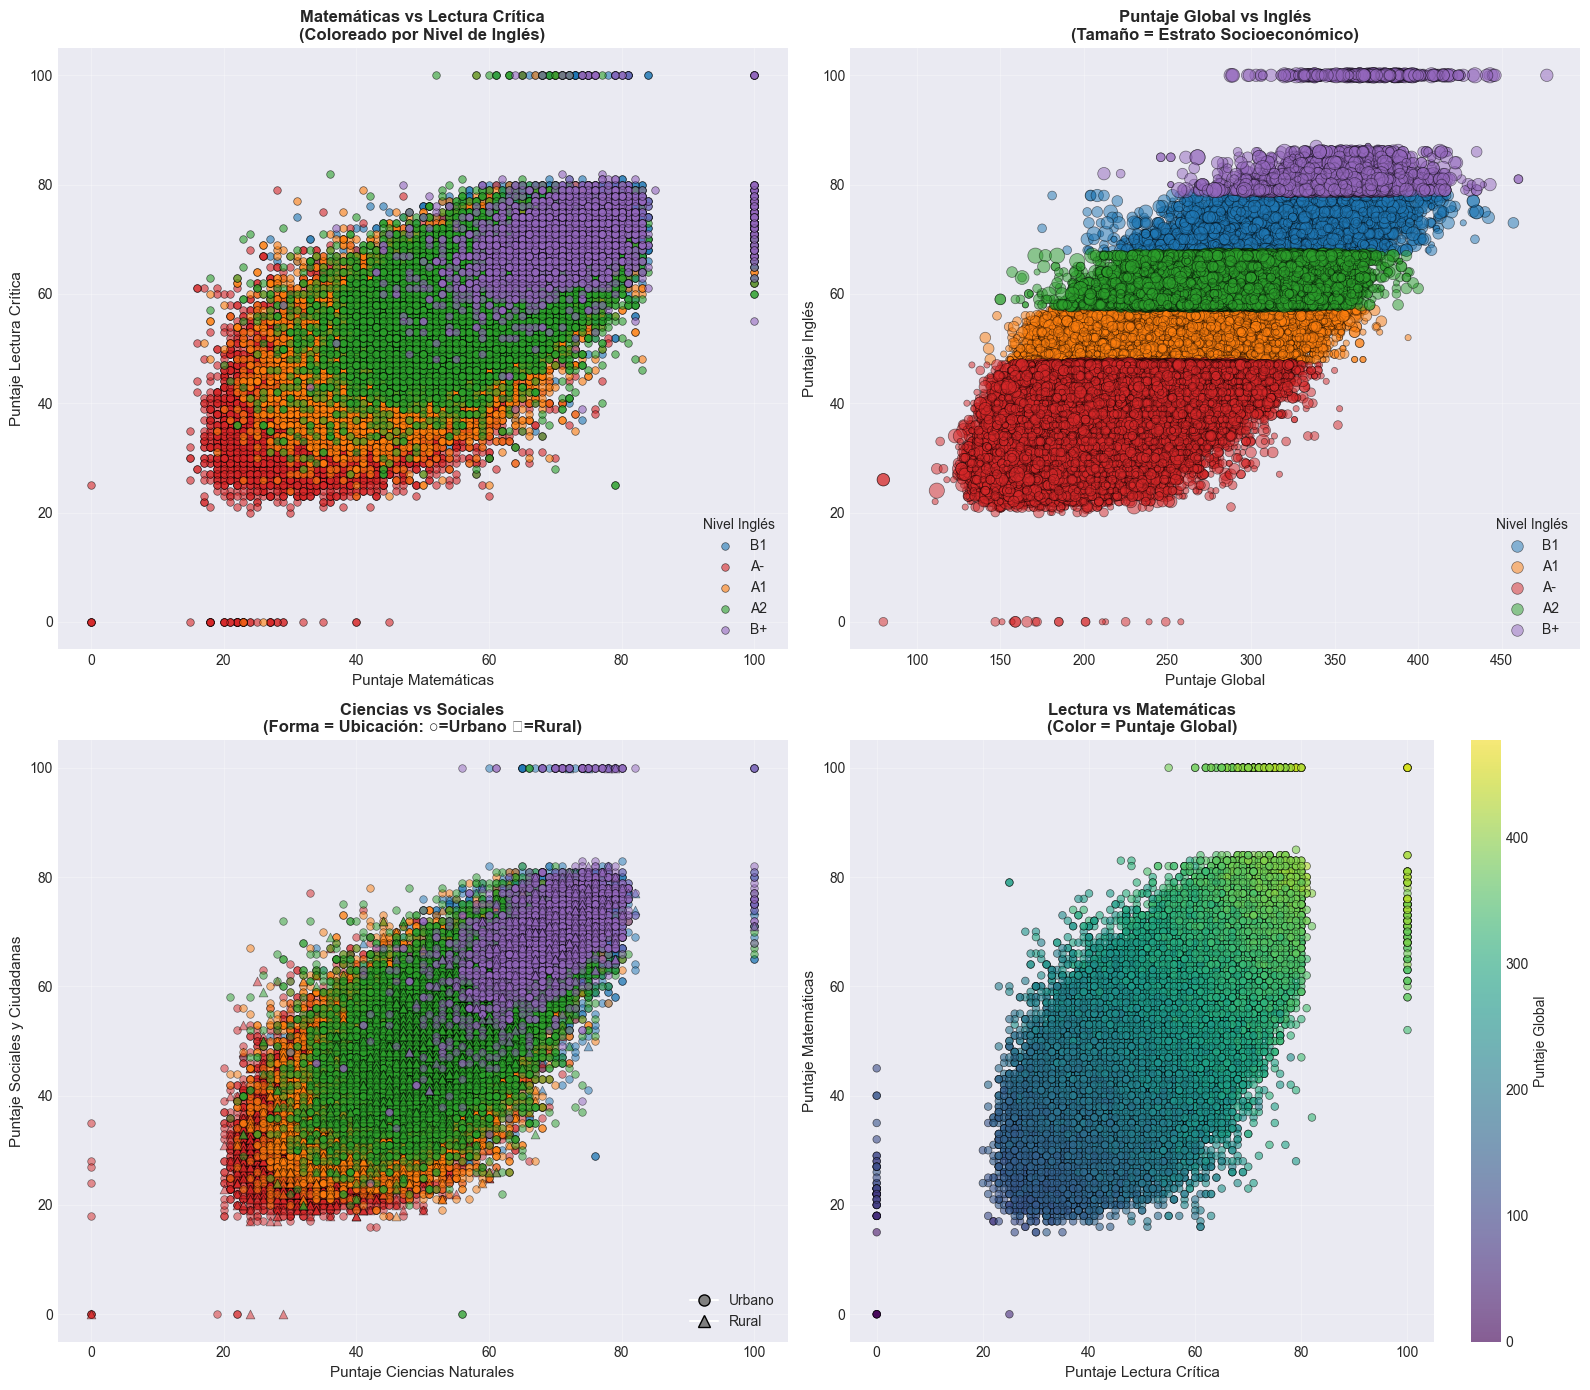

In [65]:

# ============================================
# TAREA 5: VISUALIZACIONES MULTIVARIADAS
# ============================================

print("\n\n" + "="*80)
print("TAREA 5: VISUALIZACIONES MULTIVARIADAS")
print("="*80 + "\n")

"""
Este código genera visualizaciones multivariadas avanzadas para entender
las relaciones entre múltiples variables y su impacto en DESEMP_INGLES.

Incluye:
- Scatter plots con codificación de color
- Boxplots por categorías
- Pair plots
- Heatmaps de correlación segmentada
- Parallel coordinates
"""

# ===================
# 5.1: Scatter Plots Multivariados
# ===================

print("5.1 SCATTER PLOTS MULTIVARIADOS")
print("-" * 80 + "\n")

print("Generando scatter plots con múltiples dimensiones...\n")

# Crear paleta de colores para niveles de inglés
color_map = {'A-': '#d62728', 'A1': '#ff7f0e', 'A2': '#2ca02c', 'B1': '#1f77b4', 'B+': '#9467bd'}

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Matemáticas vs Lectura Crítica (coloreado por nivel de inglés)
ax1 = axes[0, 0]
for nivel in df[TARGET_COLUMN].unique():
    mask = df[TARGET_COLUMN] == nivel
    ax1.scatter(df.loc[mask, 'PUNT_MATEMATICAS'], 
               df.loc[mask, 'PUNT_LECTURA_CRITICA'],
               c=color_map[nivel], label=nivel, alpha=0.6, s=30, edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Puntaje Matemáticas', fontsize=11)
ax1.set_ylabel('Puntaje Lectura Crítica', fontsize=11)
ax1.set_title('Matemáticas vs Lectura Crítica\n(Coloreado por Nivel de Inglés)', 
             fontsize=12, fontweight='bold')
ax1.legend(title='Nivel Inglés', loc='lower right')
ax1.grid(alpha=0.3)

# Plot 2: Puntaje Global vs Puntaje Inglés (tamaño por estrato)
ax2 = axes[0, 1]
# Crear variable de tamaño basada en estrato
if 'FAMI_ESTRATOVIVIENDA' in df.columns:
    df_temp = df.dropna(subset=['FAMI_ESTRATOVIVIENDA', 'PUNT_GLOBAL', 'PUNT_INGLES'])
    estrato_map = {'Estrato 1': 20, 'Estrato 2': 40, 'Estrato 3': 60, 
                   'Estrato 4': 80, 'Estrato 5': 100, 'Estrato 6': 120}
    df_temp['size'] = df_temp['FAMI_ESTRATOVIVIENDA'].map(estrato_map).fillna(40)
    
    for nivel in df_temp[TARGET_COLUMN].unique():
        mask = df_temp[TARGET_COLUMN] == nivel
        ax2.scatter(df_temp.loc[mask, 'PUNT_GLOBAL'], 
                   df_temp.loc[mask, 'PUNT_INGLES'],
                   c=color_map[nivel], s=df_temp.loc[mask, 'size'], 
                   alpha=0.5, label=nivel, edgecolors='black', linewidth=0.5)
    
    ax2.set_xlabel('Puntaje Global', fontsize=11)
    ax2.set_ylabel('Puntaje Inglés', fontsize=11)
    ax2.set_title('Puntaje Global vs Inglés\n(Tamaño = Estrato Socioeconómico)', 
                 fontsize=12, fontweight='bold')
    ax2.legend(title='Nivel Inglés', loc='lower right')
    ax2.grid(alpha=0.3)

# Plot 3: Ciencias Naturales vs Sociales (forma por área ubicación)
ax3 = axes[1, 0]
if 'COLE_AREA_UBICACION' in df.columns:
    df_temp = df.dropna(subset=['COLE_AREA_UBICACION', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS'])
    
    for nivel in df_temp[TARGET_COLUMN].unique():
        mask_nivel = df_temp[TARGET_COLUMN] == nivel
        
        # Urbano
        mask_urbano = mask_nivel & (df_temp['COLE_AREA_UBICACION'] == 'URBANO')
        ax3.scatter(df_temp.loc[mask_urbano, 'PUNT_C_NATURALES'], 
                   df_temp.loc[mask_urbano, 'PUNT_SOCIALES_CIUDADANAS'],
                   c=color_map[nivel], marker='o', alpha=0.5, s=30, 
                   edgecolors='black', linewidth=0.5)
        
        # Rural
        mask_rural = mask_nivel & (df_temp['COLE_AREA_UBICACION'] == 'RURAL')
        ax3.scatter(df_temp.loc[mask_rural, 'PUNT_C_NATURALES'], 
                   df_temp.loc[mask_rural, 'PUNT_SOCIALES_CIUDADANAS'],
                   c=color_map[nivel], marker='^', alpha=0.5, s=40, 
                   edgecolors='black', linewidth=0.5)
    
    # Leyendas
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
                             markersize=8, label='Urbano', markeredgecolor='black'),
                      Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', 
                            markersize=8, label='Rural', markeredgecolor='black')]
    
    ax3.legend(handles=legend_elements, loc='lower right')
    ax3.set_xlabel('Puntaje Ciencias Naturales', fontsize=11)
    ax3.set_ylabel('Puntaje Sociales y Ciudadanas', fontsize=11)
    ax3.set_title('Ciencias vs Sociales\n(Forma = Ubicación: ○=Urbano △=Rural)', 
                 fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)

# Plot 4: Dispersión 3D simulada (2D con codificación de color por tercera variable)
ax4 = axes[1, 1]
if 'PUNT_GLOBAL' in df.columns and 'PUNT_LECTURA_CRITICA' in df.columns:
    scatter = ax4.scatter(df['PUNT_LECTURA_CRITICA'], df['PUNT_MATEMATICAS'],
                         c=df['PUNT_GLOBAL'], cmap='viridis', alpha=0.6, s=30,
                         edgecolors='black', linewidth=0.5)
    
    ax4.set_xlabel('Puntaje Lectura Crítica', fontsize=11)
    ax4.set_ylabel('Puntaje Matemáticas', fontsize=11)
    ax4.set_title('Lectura vs Matemáticas\n(Color = Puntaje Global)', 
                 fontsize=12, fontweight='bold')
    plt.colorbar(scatter, ax=ax4, label='Puntaje Global')
    ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()



5.2 BOXPLOTS COMPARATIVOS POR CATEGORÍAS
--------------------------------------------------------------------------------

Generando boxplots para comparar distribuciones...




5.2 BOXPLOTS COMPARATIVOS POR CATEGORÍAS
--------------------------------------------------------------------------------

Generando boxplots para comparar distribuciones...



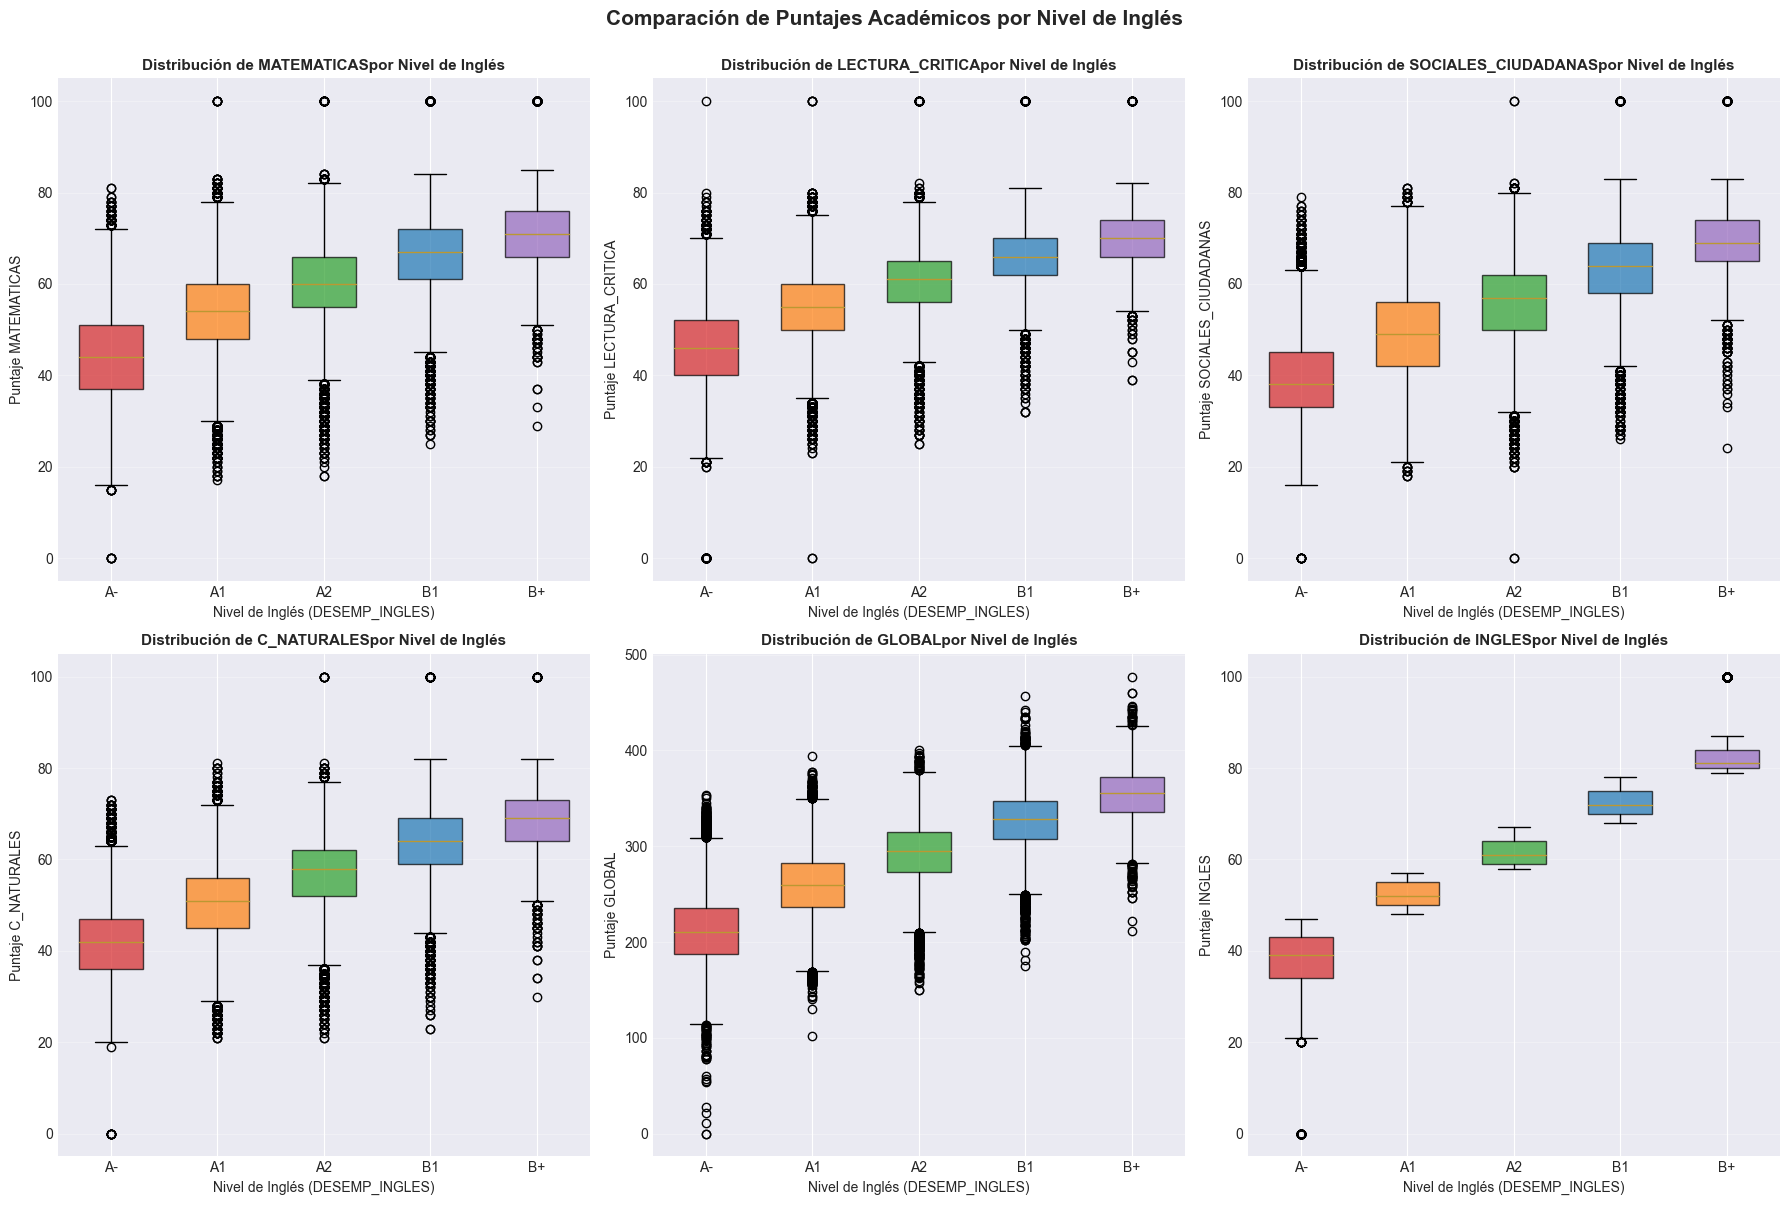

In [66]:

# ===================
# 5.2: Boxplots Comparativos
# ===================

print("\n5.2 BOXPLOTS COMPARATIVOS POR CATEGORÍAS")
print("-" * 80 + "\n")

print("Generando boxplots para comparar distribuciones...\n")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Variables numéricas a comparar
vars_to_plot = ['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_SOCIALES_CIUDADANAS',
                'PUNT_C_NATURALES', 'PUNT_GLOBAL', 'PUNT_INGLES']

for idx, var in enumerate(vars_to_plot):
    if var in df.columns:
        # Preparar datos por nivel de inglés
        data_by_level = [df[df[TARGET_COLUMN] == nivel][var].dropna().values 
                        for nivel in ['A-', 'A1', 'A2', 'B1', 'B+']]
        
        bp = axes[idx].boxplot(data_by_level, labels=['A-', 'A1', 'A2', 'B1', 'B+'],
                              patch_artist=True, widths=0.6)
        
        # Colorear cajas
        colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd']
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[idx].set_xlabel('Nivel de Inglés (DESEMP_INGLES)', fontsize=10)
        axes[idx].set_ylabel(var.replace('PUNT_', 'Puntaje '), fontsize=10)
        axes[idx].set_title(f'Distribución de {var.replace("PUNT_", "")}por Nivel de Inglés', 
                          fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Comparación de Puntajes Académicos por Nivel de Inglés', 
            fontsize=15, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()



5.3 HEATMAPS DE CORRELACIÓN SEGMENTADOS
--------------------------------------------------------------------------------

Generando heatmaps de correlación por segmentos...




5.3 HEATMAPS DE CORRELACIÓN SEGMENTADOS
--------------------------------------------------------------------------------

Generando heatmaps de correlación por segmentos...



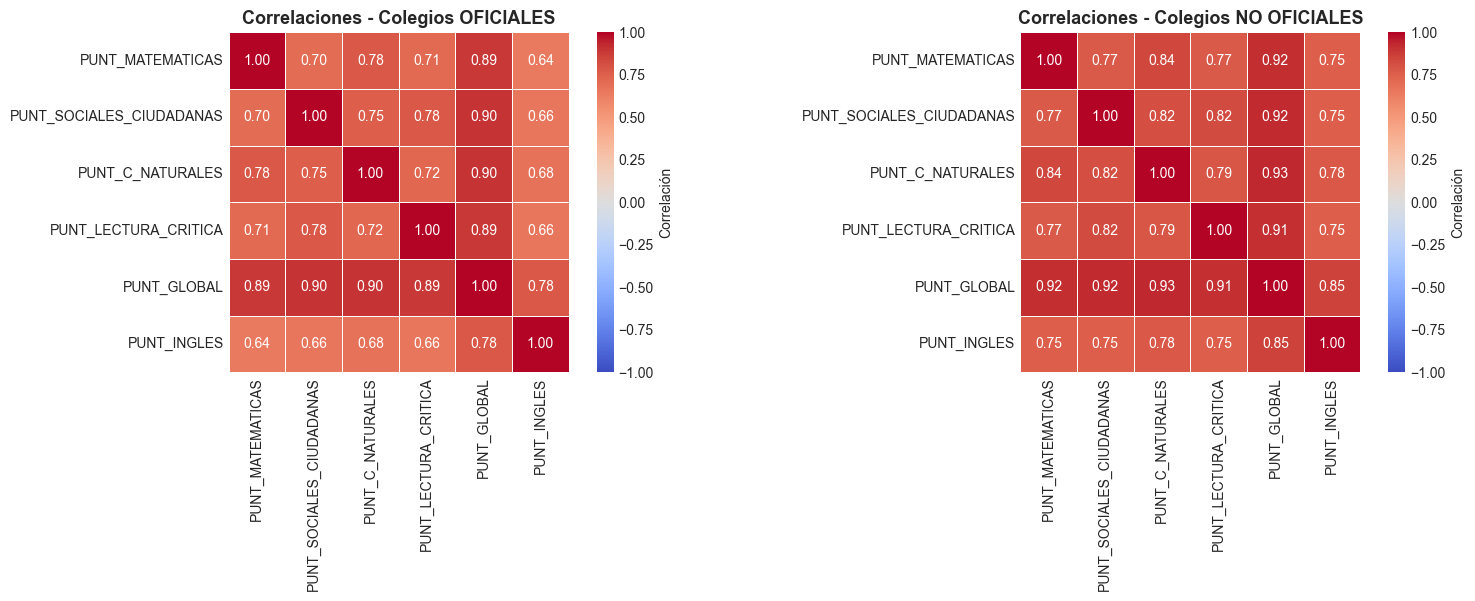

In [67]:

# ===================
# 5.3: Heatmaps de Correlación Segmentados
# ===================

print("\n5.3 HEATMAPS DE CORRELACIÓN SEGMENTADOS")
print("-" * 80 + "\n")

print("Generando heatmaps de correlación por segmentos...\n")

# Segmentar por tipo de colegio
if 'COLE_NATURALEZA' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    score_cols_subset = [col for col in score_vars if col in df.columns][:5]  # Top 5 puntajes
    
    # Oficial
    df_oficial = df[df['COLE_NATURALEZA'] == 'OFICIAL']
    corr_oficial = df_oficial[score_cols_subset + ['PUNT_INGLES']].corr()
    
    sns.heatmap(corr_oficial, annot=True, fmt='.2f', cmap='coolwarm', 
               center=0, vmin=-1, vmax=1, ax=axes[0],
               square=True, linewidths=0.5, cbar_kws={'label': 'Correlación'})
    axes[0].set_title('Correlaciones - Colegios OFICIALES', fontsize=13, fontweight='bold')
    
    # No Oficial
    df_no_oficial = df[df['COLE_NATURALEZA'] == 'NO OFICIAL']
    corr_no_oficial = df_no_oficial[score_cols_subset + ['PUNT_INGLES']].corr()
    
    sns.heatmap(corr_no_oficial, annot=True, fmt='.2f', cmap='coolwarm', 
               center=0, vmin=-1, vmax=1, ax=axes[1],
               square=True, linewidths=0.5, cbar_kws={'label': 'Correlación'})
    axes[1].set_title('Correlaciones - Colegios NO OFICIALES', fontsize=13, fontweight='bold')
    
    plt.tight_layout()
    plt.show()



5.4 PAIR PLOT (MATRIZ DE DISPERSIÓN)
--------------------------------------------------------------------------------

Generando pair plot para variables clave...




5.4 PAIR PLOT (MATRIZ DE DISPERSIÓN)
--------------------------------------------------------------------------------

Generando pair plot para variables clave...



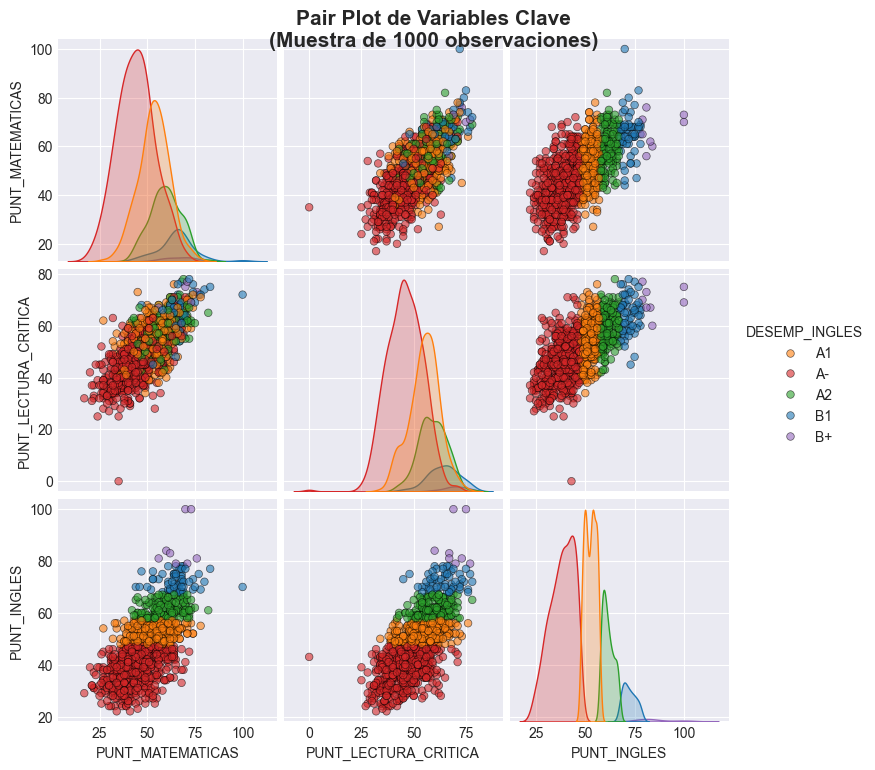

In [68]:

# ===================
# 5.4: Pair Plot (Matriz de Dispersión)
# ===================

print("\n5.4 PAIR PLOT (MATRIZ DE DISPERSIÓN)")
print("-" * 80 + "\n")

print("Generando pair plot para variables clave...\n")

# Seleccionar subset de datos para pair plot (más eficiente)
sample_size = min(1000, len(df))
df_sample = df.sample(n=sample_size, random_state=RANDOM_STATE)

# Variables para pair plot
vars_pairplot = ['PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_INGLES', TARGET_COLUMN]
vars_pairplot = [v for v in vars_pairplot if v in df_sample.columns]

if len(vars_pairplot) >= 3:
    import seaborn as sns
    
    pairplot = sns.pairplot(df_sample[vars_pairplot], 
                           hue=TARGET_COLUMN, 
                           palette=color_map,
                           plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'black', 'linewidth': 0.5},
                           diag_kind='kde',
                           corner=False)
    
    pairplot.fig.suptitle(f'Pair Plot de Variables Clave\n(Muestra de {sample_size} observaciones)', 
                         fontsize=15, fontweight='bold', y=1.02)
    plt.show()



5.5 ANÁLISIS DE FRECUENCIAS MULTIVARIADO
--------------------------------------------------------------------------------

Generando visualizaciones de frecuencias cruzadas...




5.5 ANÁLISIS DE FRECUENCIAS MULTIVARIADO
--------------------------------------------------------------------------------

Generando visualizaciones de frecuencias cruzadas...



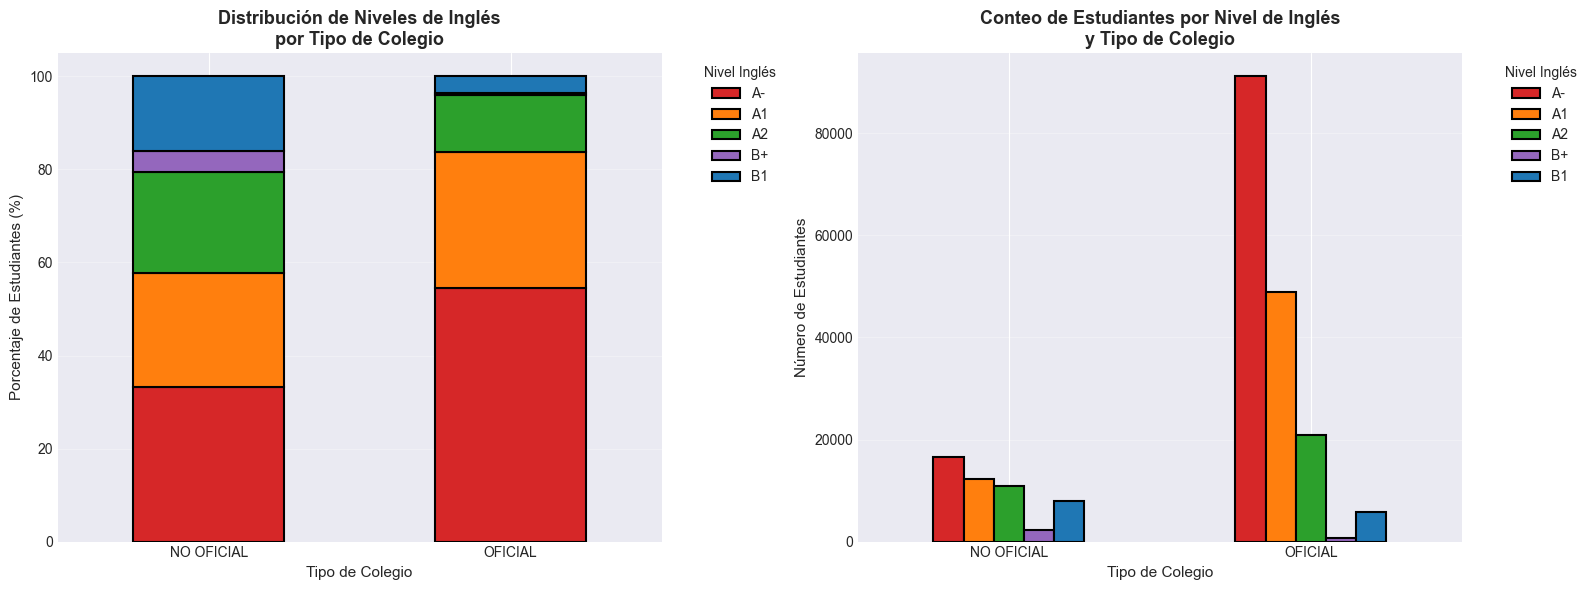


5.5 ANÁLISIS DE FRECUENCIAS MULTIVARIADO
--------------------------------------------------------------------------------

Generando visualizaciones de frecuencias cruzadas...



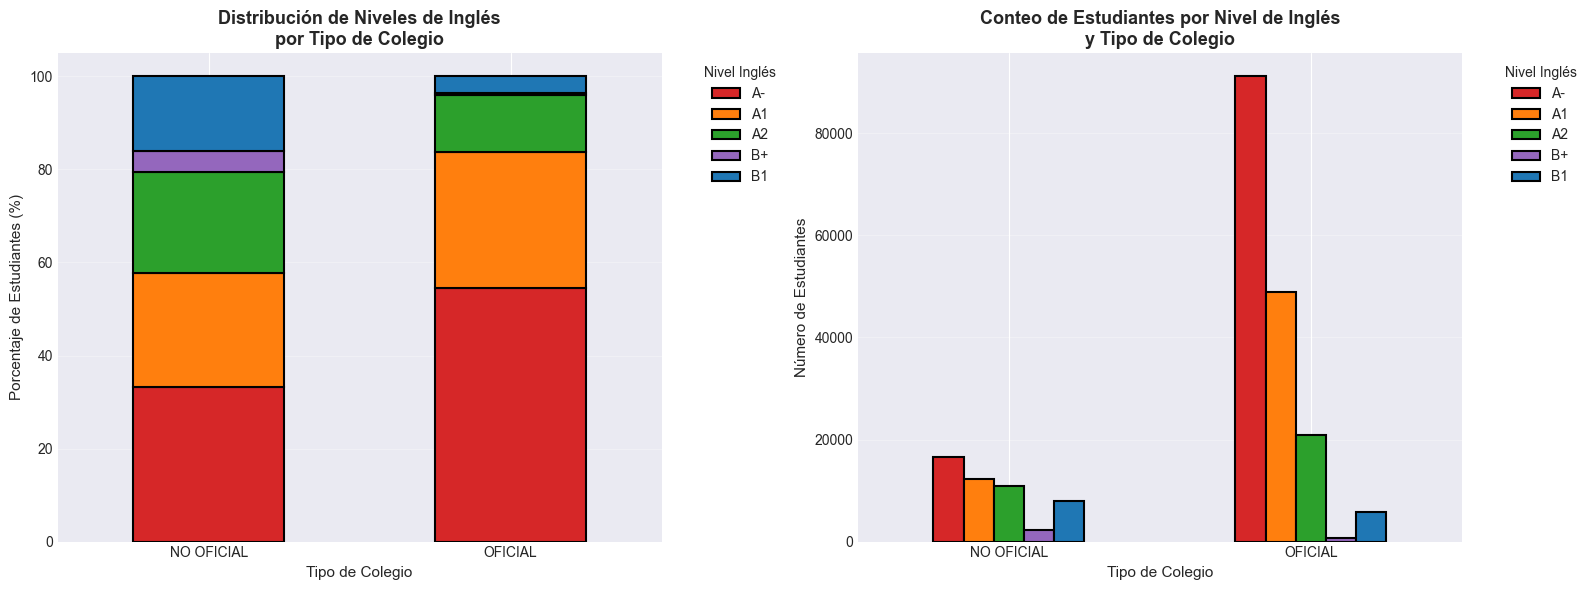

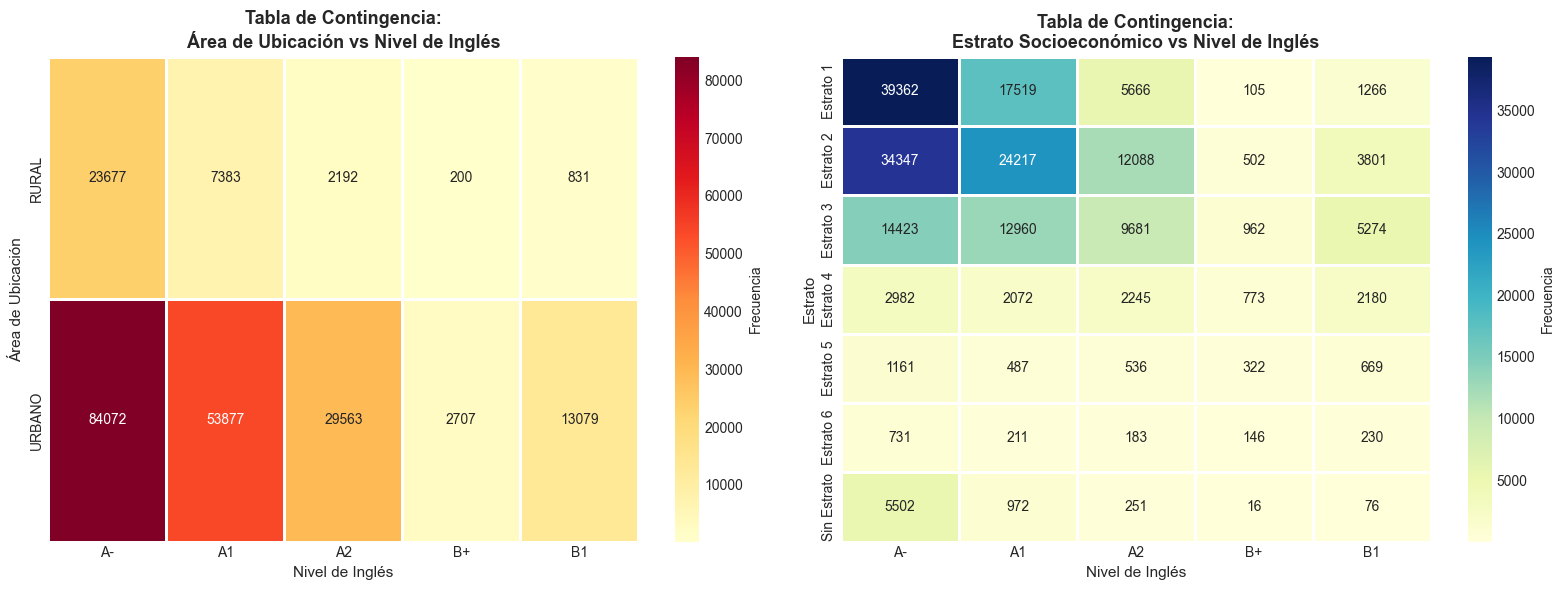


✅ TAREA 5 COMPLETADA

INTERPRETACIÓN:
Las visualizaciones multivariadas revelan patrones importantes:

1. SCATTER PLOTS:
   - Clara correlación positiva entre todas las áreas académicas
   - Estudiantes con mejor desempeño global tienden a tener mejor inglés
   - Gradiente visible entre niveles de inglés en espacio multidimensional

2. BOXPLOTS:
   - Medianas de puntajes aumentan consistentemente con nivel de inglés
   - Mayor dispersión en niveles básicos (A-, A1)
   - Menor dispersión en niveles avanzados (B1, B+)

3. HEATMAPS SEGMENTADOS:
   - Correlaciones más fuertes en colegios no oficiales
   - Patrones similares pero magnitudes diferentes según tipo de colegio

4. TABLAS DE CONTINGENCIA:
   - Brecha urbano-rural evidente: rural concentrado en A-
   - Gradiente socioeconómico claro: estratos altos → mejores niveles
   - Tipo de colegio (oficial/no oficial) muestra diferencias significativas

Estos patrones confirman las hipótesis formuladas en la Tarea 2 y guiarán
la selección 

In [69]:

# ===================
# 5.5: Visualización de Frecuencias por Categorías
# ===================

print("\n5.5 ANÁLISIS DE FRECUENCIAS MULTIVARIADO")
print("-" * 80 + "\n")

print("Generando visualizaciones de frecuencias cruzadas...\n")

# Stacked bar chart: Nivel de inglés por tipo de colegio
if 'COLE_NATURALEZA' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Tabla de contingencia
    ct = pd.crosstab(df['COLE_NATURALEZA'], df[TARGET_COLUMN], normalize='index') * 100
    
    # Stacked bar
    ct.plot(kind='bar', stacked=True, ax=axes[0], color=[color_map[c] for c in ct.columns],
           edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('Tipo de Colegio', fontsize=11)
    axes[0].set_ylabel('Porcentaje de Estudiantes (%)', fontsize=11)
    axes[0].set_title('Distribución de Niveles de Inglés\npor Tipo de Colegio', 
                     fontsize=13, fontweight='bold')
    axes[0].legend(title='Nivel Inglés', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Grouped bar (lado a lado)
    ct_abs = pd.crosstab(df['COLE_NATURALEZA'], df[TARGET_COLUMN])
    ct_abs.plot(kind='bar', ax=axes[1], color=[color_map[c] for c in ct_abs.columns],
               edgecolor='black', linewidth=1.5)
    axes[1].set_xlabel('Tipo de Colegio', fontsize=11)
    axes[1].set_ylabel('Número de Estudiantes', fontsize=11)
    axes[1].set_title('Conteo de Estudiantes por Nivel de Inglés\ny Tipo de Colegio', 
                     fontsize=13, fontweight='bold')
    axes[1].legend(title='Nivel Inglés', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Heatmap de tabla de contingencia
if 'COLE_AREA_UBICACION' in df.columns and 'FAMI_ESTRATOVIVIENDA' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Contingencia: Área vs Nivel de Inglés
    ct1 = pd.crosstab(df['COLE_AREA_UBICACION'], df[TARGET_COLUMN])
    sns.heatmap(ct1, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0], 
               cbar_kws={'label': 'Frecuencia'}, linewidths=1)
    axes[0].set_title('Tabla de Contingencia:\nÁrea de Ubicación vs Nivel de Inglés', 
                     fontsize=13, fontweight='bold')
    axes[0].set_ylabel('Área de Ubicación', fontsize=11)
    axes[0].set_xlabel('Nivel de Inglés', fontsize=11)
    
    # Contingencia: Estrato vs Nivel de Inglés
    df_estrato = df.dropna(subset=['FAMI_ESTRATOVIVIENDA'])
    ct2 = pd.crosstab(df_estrato['FAMI_ESTRATOVIVIENDA'], df_estrato[TARGET_COLUMN])
    sns.heatmap(ct2, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1], 
               cbar_kws={'label': 'Frecuencia'}, linewidths=1)
    axes[1].set_title('Tabla de Contingencia:\nEstrato Socioeconómico vs Nivel de Inglés', 
                     fontsize=13, fontweight='bold')
    axes[1].set_ylabel('Estrato', fontsize=11)
    axes[1].set_xlabel('Nivel de Inglés', fontsize=11)
    
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("✅ TAREA 5 COMPLETADA")
print("="*80)

print("""
INTERPRETACIÓN:
Las visualizaciones multivariadas revelan patrones importantes:

1. SCATTER PLOTS:
   - Clara correlación positiva entre todas las áreas académicas
   - Estudiantes con mejor desempeño global tienden a tener mejor inglés
   - Gradiente visible entre niveles de inglés en espacio multidimensional

2. BOXPLOTS:
   - Medianas de puntajes aumentan consistentemente con nivel de inglés
   - Mayor dispersión en niveles básicos (A-, A1)
   - Menor dispersión en niveles avanzados (B1, B+)

3. HEATMAPS SEGMENTADOS:
   - Correlaciones más fuertes en colegios no oficiales
   - Patrones similares pero magnitudes diferentes según tipo de colegio

4. TABLAS DE CONTINGENCIA:
   - Brecha urbano-rural evidente: rural concentrado en A-
   - Gradiente socioeconómico claro: estratos altos → mejores niveles
   - Tipo de colegio (oficial/no oficial) muestra diferencias significativas

Estos patrones confirman las hipótesis formuladas en la Tarea 2 y guiarán
la selección de features y estrategias de modelado.
""")

In [ ]:
# ===================
# GUARDAR CHECKPOINT DE LA SECCIÓN 1

# Guardar variables seleccionadas y resumen
checkpoint_seccion1 = {
    'variables_numericas_top': corr_df.head(10)['Variable'].tolist(),
    'variables_categoricas_top': assoc_df.head(10)['Variable'].tolist(),
    'variables_seleccionadas_modelado': selected_features,
    'n_variables_total': len(selected_features)
}

import json
with open('../outputs/seccion1/checkpoint_seccion1_completa.json', 'w') as f:
    json.dump(checkpoint_seccion1, f, indent=2)

print("\n💾 Checkpoint guardado: checkpoint_seccion1_completa.json")

print("\n" + "="*80)
print("🎉 ¡SECCIÓN 1 COMPLETADA!")
print("="*80)
